In [1]:
import numpy as np
import pandas as pd
import gc
from multiprocessing import Pool

import cmasher as cmr
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=Warning) 
from scipy import stats
from minepy import MINE

path_csv = "/media/temp/bego/snapshots_resim/"
path_datos = "/home/bego/GARROTXA_copia/datos_GARROTXA_resim/"
path_results = "/home/bego/GARROTXA/GalaDyn/results/"
path_crossmatch = "/home/bego/GARROTXA/satelites_crossmatch/"
path_figures_acceleration = "/home/bego/GARROTXA/aceleration_figures/"
path_figures = "/home/bego/GARROTXA/acceleration_figures/"
path_acceleration = "/home/bego/GARROTXA/acceleration/"
path_disk = "/home/bego/GARROTXA/disco/"
seconds_to_Myr = 3.15576e+16

In [2]:
df15 = pd.read_csv(path_results + f"10-15kpc_dynamic_data_v2.csv", sep = ",", index_col = 0)
df10 = pd.read_csv(path_results + f"5-10kpc_dynamic_data_v2.csv", sep = ",", index_col = 0)
#df5 = pd.read_csv(path_results + f"0-5kpc_dynamic_data.csv", sep = ",", index_col = 0)


In [3]:
from scipy import stats
from minepy import MINE
mine = MINE(alpha=0.6, c=15, est="mic_approx")
def print_stats(mine):
    print ("MIC", mine.mic())
    print ("MAS", mine.mas())
    print ("MEV", mine.mev())
    print ("MCN (eps=0)", mine.mcn(0))
    print ("MCN (eps=1-MIC)", mine.mcn_general())
    print ("GMIC", mine.gmic())
    print ("TIC", mine.tic())



In [4]:

def add_satellites(ax):
    transparencia = 0.1
    tamaño = 2   
    #arania
    ax.axvline(x = 6.32, ls='--', c = "mediumblue", linewidth = tamaño, alpha = transparencia)
    ax.axvline(x = 3.90, ls='--', c = "mediumblue", linewidth = tamaño, alpha = transparencia)
    ax.axvline(x = 1.93,ls='--', c = "mediumblue", linewidth = tamaño, alpha = transparencia)
    ax.axvline(x = 0.17, ls='--', c = "mediumblue", linewidth = tamaño, alpha = transparencia)
    #Grillo
    ax.axvline(x = 6.86,ls='--', c = "red", linewidth =tamaño, alpha = transparencia)
    ax.axvline(x = 5.21,ls='--', c = "red", linewidth =tamaño, alpha = transparencia)
    ax.axvline(x = 3.42,ls='--', c = "red", linewidth =tamaño, alpha = transparencia)
    ax.axvline(x = 1.62,ls='--', c = "red", linewidth =tamaño, alpha = transparencia)
    ax.axvline(x = 0.04,ls='--',c = "red", linewidth =tamaño, alpha = transparencia)
    #mosquito
    ax.axvline(x = 7.30,ls='--', c = "magenta", linewidth =tamaño, alpha = transparencia)
    ax.axvline(x = 5.63,ls='--', c = "magenta", linewidth =tamaño, alpha =transparencia)
    ax.axvline(x = 3.99, ls='--',c = "magenta", linewidth =tamaño, alpha = transparencia)
    ax.axvline(x = 2.09,ls='--', c = "magenta", linewidth =tamaño, alpha = transparencia)
    ax.axvline(x = 0.1,ls='--', c = "magenta", linewidth =tamaño, alpha = transparencia)

In [11]:
df15

Lookback         Z         VZ    Bending  Breathing   density  BendingM2  \
0    7.641375  0.417911  13.723418  11.615044   2.350567  0.168309   5.189590   
1    7.596713  0.485275  11.184360   9.992885   1.443388  0.168344   3.474554   
2    7.566684  0.473804  10.339379   9.735290   1.315938  0.206370   3.410600   
3    7.533391  0.448126  10.763557   9.971584   1.416065  0.211574   3.773289   
4    7.482980  0.349780  11.937704  11.275937   1.493219  0.134932   3.497443   
..        ...       ...        ...        ...        ...       ...        ...   
220  0.140454  0.054673   1.045432   0.852107   1.473311  0.337612   0.804046   
221  0.100925  0.055629   1.069355   1.021869   1.461848  0.317252   0.738803   
222  0.079098  0.060855   1.194949   1.065165   1.255009  0.312423   0.837958   
223  0.057232  0.065249   1.187703   1.078219   1.306889  0.306374   0.881425   
224  0.013209  0.065498   1.566197   1.422406   1.388702  0.299229   1.042444   

     BreathingM2  densityM2         DM        Gas      Stars  Satelites  \
0       8.228859   5.189590  43.949140  66.178707   8.257057   0.024477   
1       8.272188   3.474554  35.367123  44.126771   8.355391   0.033394   
2       7.794048   3.410600  26.960473  28.257479  10.157289   0.041124   
3       8.339641   3.773289  36.815722  22.741099   8.261071   0.051349   
4       7.419509   3.497443  27.224568  37.153402   7.736412   0.066845   
..           ...        ...        ...        ...        ...        ...   
220     4.382034   0.804046  14.382300  26.288741   8.407128   0.541135   
221     4.346010   0.738803  16.990018  24.561643   6.741364   0.493460   
222     4.336350   0.837958  17.210351  30.339461   9.920320   0.449974   
223     4.263980   0.881425  10.877019  32.111231   6.946177   0.400456   
224     4.107054   1.042444  10.817317  35.271265   7.008883        NaN   

           All     DM_out    DM_inner  
0    50.797960  13.618917   99.988245  
1    30.958294  10.334437   88.725212  
2    21.466601  10.689419  107.234534  
3    21.375473  11.306639  166.005332  
4    21.566757   8.973001  193.424444  
..         ...        ...         ...  
220  27.111136   3.825295  122.089566  
221  23.458476   4.901063  128.646059  
222  25.218150   5.132369  106.997059  
223  22.518674   5.140990   95.056340  
224  26.736919   5.414827   87.853732  

[225 rows x 16 columns]

In [5]:
def calculate_correlation (var1, var2, df):
   # print(stats.spearmanr(df[f"{var1}"],df[f"{var2}"]).pvalue)
 #   if stats.spearmanr(df[f"{var1}"],df[f"{var2}"]).pvalue > 0.05:
  #      return 0
  #  else:
    #    return stats.spearmanr(df[f"{var1}"],df[f"{var2}"]).correlation
    return stats.pearsonr(df[f"{var1}"],df[f"{var2}"])[0]

def calculate_match (var1, var2, df):
   # print(stats.spearmanr(df[f"{var1}"],df[f"{var2}"]).pvalue)
    cor_res = stats.pearsonr(df[f"{var1}"],df[f"{var2}"])
    #print(cor_res)
    if cor_res [1]< 0.05:
        if cor_res[0]> 0.4:
            return cor_res[0]
        else: 
            return np.NaN
    else:
        return np.NaN
    

In [6]:
for  i,number in enumerate(np.array(df15["density"])):
    if np.isnan(number)== True:
        print(f"Nan in position {i}")

In [6]:
variables = ["Bending", "Breathing", "density","BendingM2", "BreathingM2", "densityM2","DM", "Gas", "DM_out", "DM_inner"]
rings = ["10", "15"]
correlations = {}
match = {}
#generation of dictionary
for ring in rings:
    for var1 in variables:
        for var2 in variables:
            correlations[f"{var1}_{var2}_{ring}"] = []
            match[f"{var1}_{var2}_{ring}"] = []
window = 0.8
number_snapshots = []
lookback = []
for lb in df15["Lookback"]:
  #  print(lb)
    lookback.append(lb)
    df_w15 = df15[(df15["Lookback"]<lb + window/2)&(df15["Lookback"]>lb - window/2)]
    df_w10 = df10[(df10["Lookback"]<lb + window/2)&(df10["Lookback"]>lb - window/2)]
    number_snapshots.append(len(df_w15))
    for ring in rings:
        for var1 in variables:
            for var2 in variables:
                
              #  print(f"calculatin in ring {ring}, variables {var1}, {var2}")
                if ring == '5':
                    correlations[f"{var1}_{var2}_{ring}"].append(calculate_correlation (var1, var2, df_w5))
                    match[f"{var1}_{var2}_{ring}"].append(calculate_match (var1, var2, df_w5))
                elif ring == '10':
                    correlations[f"{var1}_{var2}_{ring}"].append(calculate_correlation (var1, var2, df_w10))
                    match[f"{var1}_{var2}_{ring}"].append(calculate_match (var1, var2, df_w10))
                elif ring == '15':
                    correlations[f"{var1}_{var2}_{ring}"].append(calculate_correlation (var1, var2, df_w15))
                    match[f"{var1}_{var2}_{ring}"].append(calculate_match (var1, var2, df_w15))
                    
    
print("done!")  
print(f"This window has a mean of {np.mean(number_snapshots)} per window to compute the statistics")

done!
This window has a mean of 23.106666666666666 per window to compute the statistics


In [7]:
colors = [ "dodgerblue","mediumblue", "limegreen",  "darkgreen",  "violet","purple", "orangered","firebrick"]

Text(0, 0.5, 'Pearson cor')

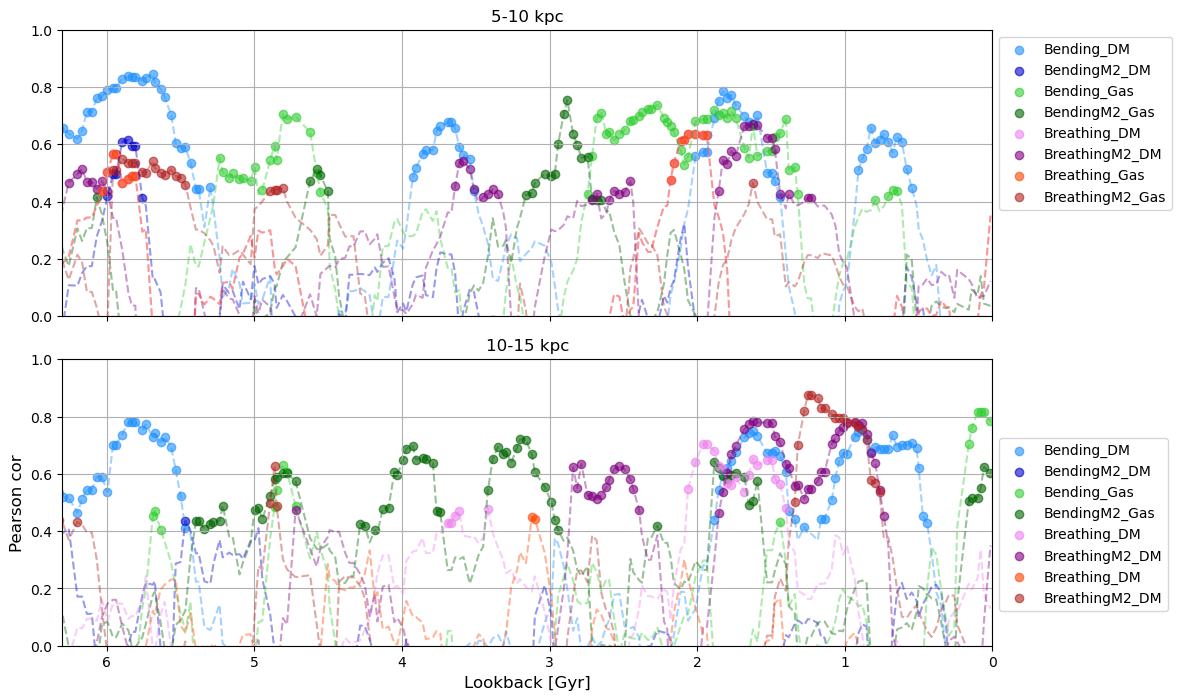

In [8]:
fig, ax = plt.subplots(2,1, sharex=True, sharey=True,figsize = (12,8))
fig.subplots_adjust(hspace=0.15, wspace=0)
transp = 0.4
transp2 = 0.6
ax[0].set_title("5-10 kpc")


ax[0].plot(lookback,correlations["Bending_DM_10"],label = "",ls  = "--", alpha =transp, color = colors[0])
ax[0].scatter(lookback,match["Bending_DM_10"],marker = "o",label = "Bending_DM",color = colors[0],alpha =transp2 )


ax[0].plot(lookback,correlations["BendingM2_DM_10"],label = "",ls  = "--", alpha =transp,color = colors[1])
ax[0].scatter(lookback,match["BendingM2_DM_10"],marker = "o",label = "BendingM2_DM",color = colors[1],alpha =transp2)

ax[0].plot(lookback,correlations["Bending_Gas_10"],label = "",ls  = "--", alpha =transp,color = colors[2])
ax[0].scatter(lookback,match["Bending_Gas_10"],marker = "o",label = "Bending_Gas",color = colors[2],alpha =transp2)


ax[0].plot(lookback,correlations["BendingM2_Gas_10"],label = "",ls  = "--", alpha =transp,color = colors[3])
ax[0].scatter(lookback,match["BendingM2_Gas_10"],marker = "o",label = "BendingM2_Gas",color = colors[3],alpha =transp2)


#ax[0].plot(lookback,correlations["Bending_density_10"],label = "",ls  = "--", alpha =transp,color = colors[4])
#ax[0].scatter(lookback,match["Bending_density_10"],marker = "o",label = "Bending_density",color = colors[4],alpha =transp2)

#ax[0].plot(lookback,correlations["BendingM2_density_10"],label = "",ls  = "--", alpha =transp,color = colors[5])
#ax[0].scatter(lookback,match["BendingM2_density_10"],marker = "o",label = "BendingM2_density",color = colors[5],alpha =transp2)


ax[0].plot(lookback,correlations["Breathing_DM_10"],label = "",ls  = "--", alpha =transp,color = colors[4])
ax[0].scatter(lookback,match["Breathing_DM_10"],marker = "o",label = "Breathing_DM",color = colors[4],alpha =transp2)

ax[0].plot(lookback,correlations["BreathingM2_DM_10"],label = "",ls  = "--", alpha =transp,color = colors[5])
ax[0].scatter(lookback,match["BreathingM2_DM_10"],marker = "o",label = "BreathingM2_DM",color = colors[5],alpha =transp2)


ax[0].plot(lookback,correlations["Breathing_DM_10"],label = "",ls  = "--", alpha =transp,color = colors[6])
ax[0].scatter(lookback,match["Breathing_DM_10"],marker = "o",label = "Breathing_Gas",color = colors[6],alpha =transp2)

ax[0].plot(lookback,correlations["BreathingM2_Gas_10"],label = "",ls  = "--", alpha =transp,color = colors[7])
ax[0].scatter(lookback,match["BreathingM2_Gas_10"],marker = "o",label = "BreathingM2_Gas",color = colors[7],alpha =transp2)


ax[0].set_xlim(6.3,0)
ax[0].set_ylim(0,1)
ax[0].grid()
ax[0].legend(bbox_to_anchor = (1., 1))

ax[1].set_title("10-15 kpc")


ax[1].plot(lookback,correlations["Bending_DM_15"],label = "",ls  = "--", alpha =transp, color = colors[0])
ax[1].scatter(lookback,match["Bending_DM_15"],marker = "o",label = "Bending_DM", color = colors[0],alpha =transp2)

ax[1].plot(lookback,correlations["BendingM2_DM_15"],label = "",ls  = "--", alpha =transp, color = colors[1])
ax[1].scatter(lookback,match["BendingM2_DM_15"],marker = "o",label = "BendingM2_DM", color = colors[1],alpha =transp2)

ax[1].plot(lookback,correlations["Bending_Gas_15"],label = "",ls  = "--", alpha =transp, color = colors[2])
ax[1].scatter(lookback,match["Bending_Gas_15"],marker = "o",label = "Bending_Gas", color = colors[2],alpha =transp2)

ax[1].plot(lookback,correlations["BendingM2_Gas_15"],label = "",ls  = "--", alpha =transp, color = colors[3])
ax[1].scatter(lookback,match["BendingM2_Gas_15"],marker = "o",label = "BendingM2_Gas", color = colors[3],alpha =transp2)



#ax[1].plot(lookback,correlations["Bending_density_15"],label = "",ls  = "--", alpha =transp, color = colors[4])
#ax[1].scatter(lookback,match["Bending_density_15"],marker = "o",label = "Bending_density", color = colors[4],alpha =transp2)

#ax[1].plot(lookback,correlations["BendingM2_density_15"],label = "",ls  = "--", alpha =transp, color = colors[5])
#ax[1].scatter(lookback,match["BendingM2_density_15"],marker = "o",label = "BendingM2_density", color = colors[5],alpha =transp2)

#ax.plot(lookback,cor_all_Z_10,label = "All-Z")
#ax[1].plot(lookback,correlations["Breathing_DM_inner_15"],label = "",ls  = "--", alpha =transp)
#ax[1].scatter(lookback,match["Breathing_DM_inner_15"],marker = "o",label = "Breathing-DM_inner")
#ax[1].plot(lookback,correlations["Breathing_DM_out_15"],label = "",ls  = "--", alpha =transp)
#ax[1].scatter(lookback,match["Breathing_DM_out_15"],marker = "o",label = "Breathing_DM_out_10")

ax[1].plot(lookback,correlations["Breathing_DM_15"],label = "",ls  = "--", alpha =transp, color = colors[4])
ax[1].scatter(lookback,match["Breathing_DM_15"],marker = "o",label = "Breathing_DM", color = colors[4],alpha =transp2)


ax[1].plot(lookback,correlations["BreathingM2_DM_15"],label = "",ls  = "--", alpha =transp, color = colors[5])
ax[1].scatter(lookback,match["BreathingM2_DM_15"],marker = "o",label = "BreathingM2_DM", color = colors[5],alpha =transp2)


ax[1].plot(lookback,correlations["Breathing_Gas_15"],label = "",ls  = "--", alpha =transp, color = colors[6])
ax[1].scatter(lookback,match["Breathing_Gas_15"],marker = "o",label = "Breathing_DM", color = colors[6],alpha =transp2)


ax[1].plot(lookback,correlations["BreathingM2_Gas_15"],label = "",ls  = "--", alpha =transp, color = colors[7])
ax[1].scatter(lookback,match["BreathingM2_Gas_15"],marker = "o",label = "BreathingM2_DM", color = colors[7],alpha =transp2)

ax[1].set_xlim(6.3, 0)
ax[1].set_ylim(0,1)

ax[1].grid()
ax[1].legend(bbox_to_anchor = (1., 0.75))
ax[1].set_xlabel('Lookback [Gyr]', fontsize = 12)
ax[1].set_ylabel('Pearson cor', fontsize = 12)
#plt.show()   #
#plt.savefig("results/correlations_Bending_Breathing.png", dpi = 100, facecolor = "white", bbox_inches = "tight")

In [ ]:
print(plt.rcParams['axes.prop_cycle'].by_key()['color'])

Text(0, 0.5, 'Pearson cor')

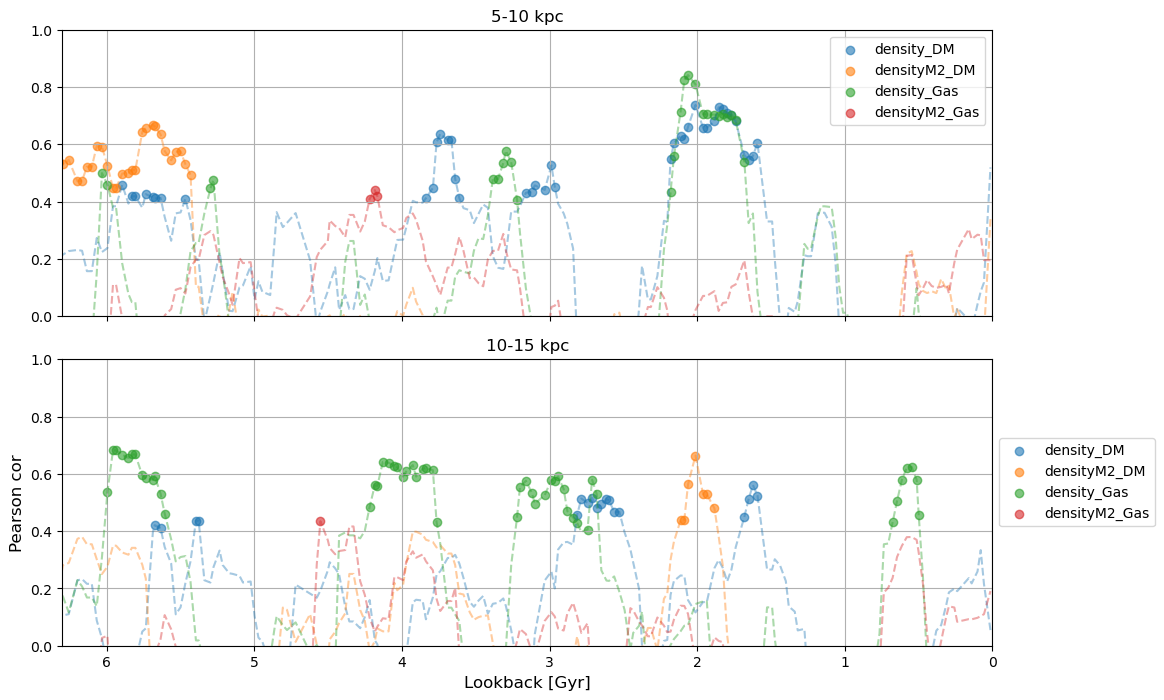

In [9]:
fig, ax = plt.subplots(2,1, sharex=True, sharey=True,figsize = (12,8))
fig.subplots_adjust(hspace=0.15, wspace=0)
transp = 0.4
transp2 = 0.6
ax[0].set_title("5-10 kpc")


ax[0].plot(lookback,correlations["density_DM_10"],label = "",ls  = "--", alpha =transp)
ax[0].scatter(lookback,match["density_DM_10"],marker = "o",label = "density_DM", alpha =transp2)
ax[0].plot(lookback,correlations["densityM2_DM_10"],label = "",ls  = "--", alpha =transp)
ax[0].scatter(lookback,match["densityM2_DM_10"],marker = "o",label = "densityM2_DM", alpha =transp2)





ax[0].plot(lookback,correlations["density_Gas_10"],label = "",ls  = "--", alpha =transp)
ax[0].scatter(lookback,match["density_Gas_10"],marker = "o",label = "density_Gas", alpha =transp2)

ax[0].plot(lookback,correlations["densityM2_Gas_10"],label = "",ls  = "--", alpha =transp)
ax[0].scatter(lookback,match["densityM2_Gas_10"],marker = "o",label = "densityM2_Gas", alpha =transp2)






ax[0].set_xlim(6.3,0)
ax[0].set_ylim(0,1)
ax[0].grid()
ax[0].legend(bbox_to_anchor = (1., 1))

ax[1].set_title("10-15 kpc")

ax[1].plot(lookback,correlations["density_DM_15"],label = "",ls  = "--", alpha =transp)
ax[1].scatter(lookback,match["density_DM_15"],marker = "o",label = "density_DM", alpha =transp2)

ax[1].plot(lookback,correlations["densityM2_DM_15"],label = "",ls  = "--", alpha =transp)
ax[1].scatter(lookback,match["densityM2_DM_15"],marker = "o",label = "densityM2_DM", alpha =transp2)



ax[1].plot(lookback,correlations["density_Gas_15"],label = "",ls  = "--", alpha =transp)
ax[1].scatter(lookback,match["density_Gas_15"],marker = "o",label = "density_Gas", alpha =transp2)
ax[1].plot(lookback,correlations["densityM2_Gas_15"],label = "",ls  = "--", alpha =transp)
ax[1].scatter(lookback,match["densityM2_Gas_15"],marker = "o",label = "densityM2_Gas", alpha =transp2)

ax[1].set_xlim(6.3, 0)
ax[1].set_ylim(0,1)

ax[1].grid()
ax[1].legend(bbox_to_anchor = (1., 0.75))
ax[1].set_xlabel('Lookback [Gyr]', fontsize = 12)
ax[1].set_ylabel('Pearson cor', fontsize = 12)
#plt.show()   
#plt.savefig("results/correlations_Z.png", dpi = 100, facecolor = "white")

Text(0, 0.5, 'Pearson cor')

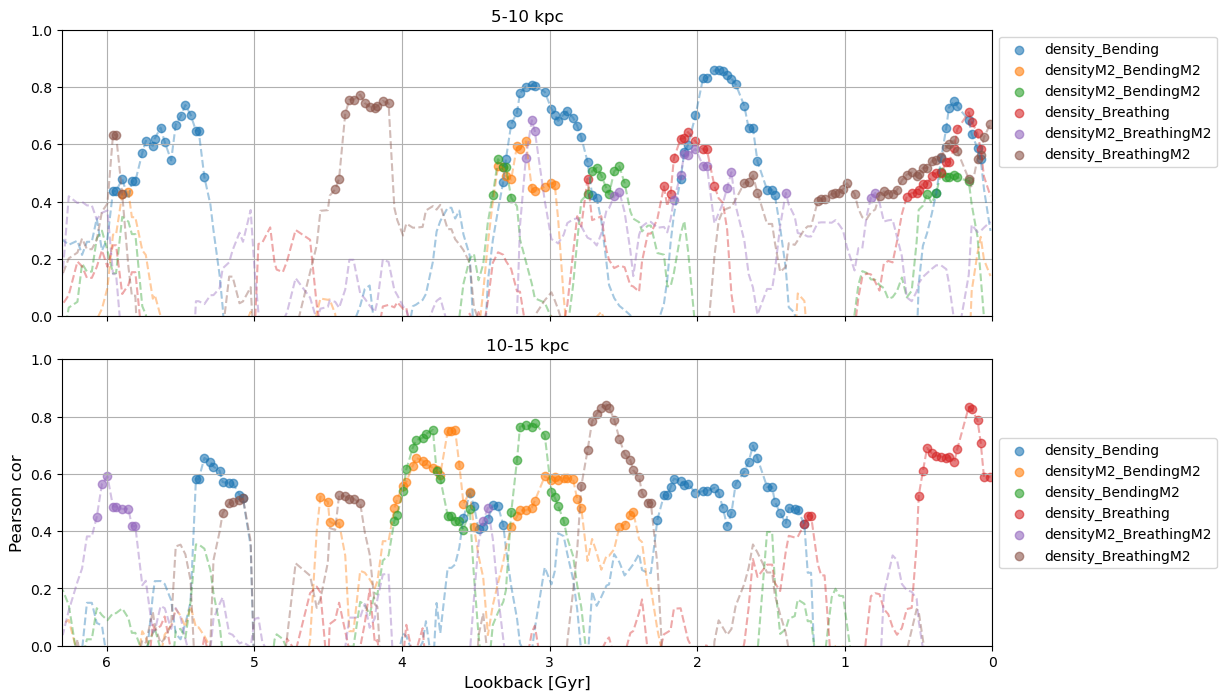

In [11]:
fig, ax = plt.subplots(2,1, sharex=True, sharey=True,figsize = (12,8))
fig.subplots_adjust(hspace=0.15, wspace=0)
transp = 0.4
transp2 = 0.6
ax[0].set_title("5-10 kpc")


ax[0].plot(lookback,correlations["density_Bending_10"],label = "",ls  = "--", alpha =transp)
ax[0].scatter(lookback,match["density_Bending_10"],marker = "o",label = "density_Bending", alpha =transp2)
ax[0].plot(lookback,correlations["densityM2_BendingM2_10"],label = "",ls  = "--", alpha =transp)
ax[0].scatter(lookback,match["densityM2_BendingM2_10"],marker = "o",label = "densityM2_BendingM2", alpha =transp2)


ax[0].plot(lookback,correlations["density_BendingM2_10"],label = "",ls  = "--", alpha =transp)
ax[0].scatter(lookback,match["density_BendingM2_10"],marker = "o",label = "densityM2_BendingM2", alpha =transp2)


ax[0].plot(lookback,correlations["density_Breathing_10"],label = "",ls  = "--", alpha =transp)
ax[0].scatter(lookback,match["density_Breathing_10"],marker = "o",label = "density_Breathing", alpha =transp2)
ax[0].plot(lookback,correlations["densityM2_BreathingM2_10"],label = "",ls  = "--", alpha =transp)
ax[0].scatter(lookback,match["densityM2_BreathingM2_10"],marker = "o",label = "densityM2_BreathingM2", alpha =transp2)


ax[0].plot(lookback,correlations["density_BreathingM2_10"],label = "",ls  = "--", alpha =transp)
ax[0].scatter(lookback,match["density_BreathingM2_10"],marker = "o",label = "density_BreathingM2", alpha =transp2)



ax[0].set_xlim(6.3,0)
ax[0].set_ylim(0,1)
ax[0].grid()
ax[0].legend(bbox_to_anchor = (1., 1))

ax[1].set_title("10-15 kpc")

ax[1].plot(lookback,correlations["density_Bending_15"],label = "",ls  = "--", alpha =transp)
ax[1].scatter(lookback,match["density_Bending_15"],marker = "o",label = "density_Bending", alpha =transp2)
ax[1].plot(lookback,correlations["densityM2_BendingM2_15"],label = "",ls  = "--", alpha =transp)
ax[1].scatter(lookback,match["densityM2_BendingM2_15"],marker = "o",label = "densityM2_BendingM2", alpha =transp2)

ax[1].plot(lookback,correlations["density_BendingM2_15"],label = "",ls  = "--", alpha =transp)
ax[1].scatter(lookback,match["density_BendingM2_15"],marker = "o",label = "density_BendingM2", alpha =transp2)



ax[1].plot(lookback,correlations["density_Breathing_15"],label = "",ls  = "--", alpha =transp)
ax[1].scatter(lookback,match["density_Breathing_15"],marker = "o",label = "density_Breathing", alpha =transp2)
ax[1].plot(lookback,correlations["densityM2_BreathingM2_15"],label = "",ls  = "--", alpha =transp)
ax[1].scatter(lookback,match["densityM2_BreathingM2_15"],marker = "o",label = "densityM2_BreathingM2", alpha =transp2)

ax[1].plot(lookback,correlations["density_BreathingM2_15"],label = "",ls  = "--", alpha =transp)
ax[1].scatter(lookback,match["density_BreathingM2_15"],marker = "o",label = "density_BreathingM2", alpha =transp2)
ax[1].set_xlim(6.3, 0)
ax[1].set_ylim(0,1)

ax[1].grid()
ax[1].legend(bbox_to_anchor = (1., 0.75))
ax[1].set_xlabel('Lookback [Gyr]', fontsize = 12)
ax[1].set_ylabel('Pearson cor', fontsize = 12)
#plt.show()   
#plt.savefig("results/correlations_Z.png", dpi = 100, facecolor = "white")

Text(0, 0.5, 'Pearson cor')

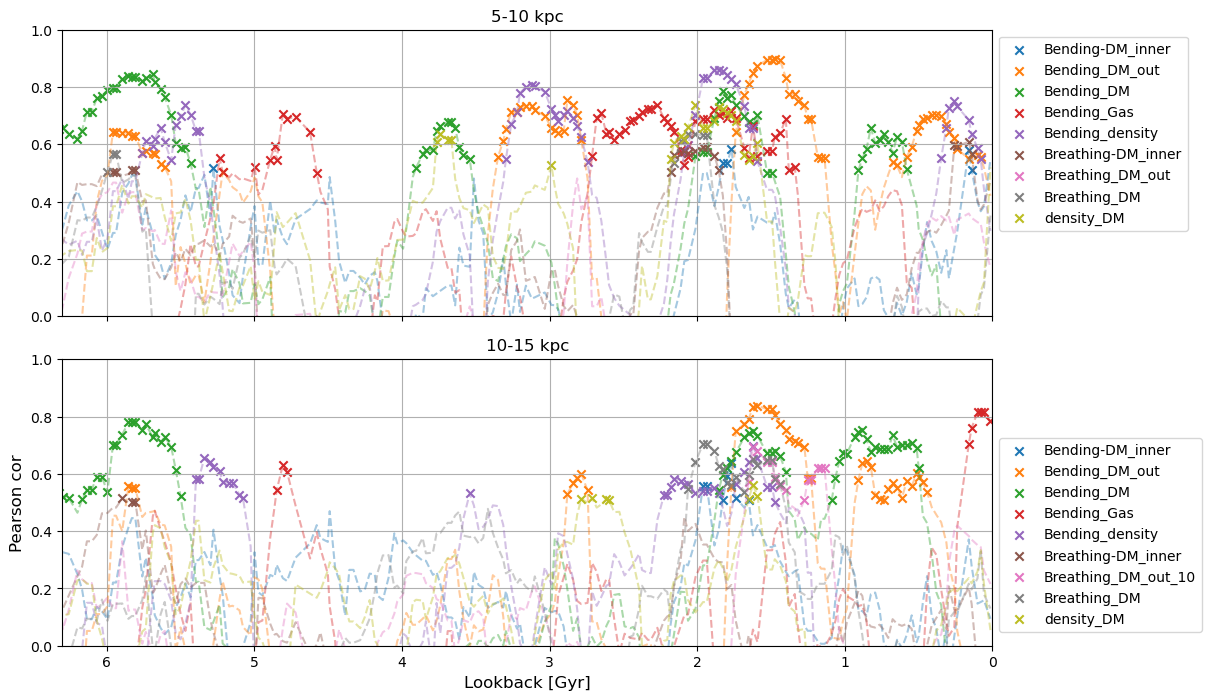

In [68]:
fig, ax = plt.subplots(2,1, sharex=True, sharey=True,figsize = (12,8))
fig.subplots_adjust(hspace=0.15, wspace=0)
transp = 0.4
ax[0].set_title("5-10 kpc")
#ax.plot(lookback,cor_all_Z_10,label = "All-Z")
ax[0].plot(lookback,correlations["Bending_DM_inner_10"],label = "",ls  = "--", alpha =transp)
ax[0].scatter(lookback,match["Bending_DM_inner_10"],marker = "o",label = "Bending-DM_inner")

ax[0].plot(lookback,correlations["Bending_DM_out_10"],label = "",ls  = "--", alpha =transp)
ax[0].scatter(lookback,match["Bending_DM_out_10"],marker = "o",label = "Bending_DM_out")

ax[0].plot(lookback,correlations["Bending_DM_10"],label = "",ls  = "--", alpha =transp)
ax[0].scatter(lookback,match["Bending_DM_10"],marker = "o",label = "Bending_DM")

ax[0].plot(lookback,correlations["Bending_Gas_10"],label = "",ls  = "--", alpha =transp)
ax[0].scatter(lookback,match["Bending_Gas_10"],marker = "o",label = "Bending_Gas")

ax[0].plot(lookback,correlations["Bending_density_10"],label = "",ls  = "--", alpha =transp)
ax[0].scatter(lookback,match["Bending_density_10"],marker = "o",label = "Bending_density")



#ax.plot(lookback,cor_all_Z_10,label = "All-Z")
ax[0].plot(lookback,correlations["Breathing_DM_inner_10"],label = "",ls  = "--", alpha =transp)
ax[0].scatter(lookback,match["Breathing_DM_inner_10"],marker = "o",label = "Breathing-DM_inner")
ax[0].plot(lookback,correlations["Breathing_DM_out_10"],label = "",ls  = "--", alpha =transp)
ax[0].scatter(lookback,match["Breathing_DM_out_10"],marker = "o",label = "Breathing_DM_out")

ax[0].plot(lookback,correlations["Breathing_DM_10"],label = "",ls  = "--", alpha =transp)
ax[0].scatter(lookback,match["Breathing_DM_10"],marker = "o",label = "Breathing_DM")


ax[0].plot(lookback,correlations["density_DM_10"],label = "",ls  = "--", alpha =transp)
ax[0].scatter(lookback,match["density_DM_10"],marker = "o",label = "density_DM")

ax[0].set_xlim(6.3,0)
ax[0].set_ylim(0,1)
ax[0].grid()
ax[0].legend(bbox_to_anchor = (1., 1))

ax[1].set_title("10-15 kpc")
ax[1].plot(lookback,correlations["Bending_DM_inner_15"],label = "",ls  = "--", alpha =transp)
ax[1].scatter(lookback,match["Bending_DM_inner_15"],marker = "o",label = "Bending-DM_inner")

ax[1].plot(lookback,correlations["Bending_DM_out_15"],label = "",ls  = "--", alpha =transp)
ax[1].scatter(lookback,match["Bending_DM_out_15"],marker = "o",label = "Bending_DM_out")

ax[1].plot(lookback,correlations["Bending_DM_15"],label = "",ls  = "--", alpha =transp)
ax[1].scatter(lookback,match["Bending_DM_15"],marker = "o",label = "Bending_DM")

ax[1].plot(lookback,correlations["Bending_Gas_15"],label = "",ls  = "--", alpha =transp)
ax[1].scatter(lookback,match["Bending_Gas_15"],marker = "o",label = "Bending_Gas")
ax[1].plot(lookback,correlations["Bending_density_15"],label = "",ls  = "--", alpha =transp)
ax[1].scatter(lookback,match["Bending_density_15"],marker = "o",label = "Bending_density")


#ax.plot(lookback,cor_all_Z_10,label = "All-Z")
ax[1].plot(lookback,correlations["Breathing_DM_inner_15"],label = "",ls  = "--", alpha =transp)
ax[1].scatter(lookback,match["Breathing_DM_inner_15"],marker = "o",label = "Breathing-DM_inner")
ax[1].plot(lookback,correlations["Breathing_DM_out_15"],label = "",ls  = "--", alpha =transp)
ax[1].scatter(lookback,match["Breathing_DM_out_15"],marker = "o",label = "Breathing_DM_out_10")

ax[1].plot(lookback,correlations["Breathing_DM_15"],label = "",ls  = "--", alpha =transp)
ax[1].scatter(lookback,match["Breathing_DM_15"],marker = "o",label = "Breathing_DM")

ax[1].plot(lookback,correlations["density_DM_15"],label = "",ls  = "--", alpha =transp)
ax[1].scatter(lookback,match["density_DM_15"],marker = "o",label = "density_DM")

ax[1].set_xlim(6.3, 0)
ax[1].set_ylim(0,1)

ax[1].grid()
ax[1].legend(bbox_to_anchor = (1., 0.75))
ax[1].set_xlabel('Lookback [Gyr]', fontsize = 12)
ax[1].set_ylabel('Pearson cor', fontsize = 12)
#plt.show()   
#plt.savefig("results/correlations_Z.png", dpi = 100, facecolor = "white")

In [41]:
variables = ["Z", "VZ", "density", "DM", "Gas","Stars","Satelites","All"]
rings = ["5", "10", "15"]
correlations = {}
match = {}
#generation of dictionary
for ring in rings:
    for var1 in variables:
        for var2 in variables:
            correlations[f"{var1}_{var2}_{ring}"] = []
            match[f"{var1}_{var2}_{ring}"] = []
window = 1
lookback = []
for lb in df15["Lookback"]:
  #  print(lb)
    lookback.append(lb)
    df_w15 = df15[(df15["Lookback"]<lb + window/2)&(df15["Lookback"]>lb - window/2)]
    df_w10 = df10[(df10["Lookback"]<lb + window/2)&(df10["Lookback"]>lb - window/2)]
    df_w5 = df5[(df5["Lookback"]<lb + window/2)&(df5["Lookback"]>lb - window/2)]
    for ring in rings:
        for var1 in variables:
            for var2 in variables:
          #      print(f"calculatin in ring {ring}, variables {var1}, {var2}")
                if ring == '5':
                    correlations[f"{var1}_{var2}_{ring}"].append(calculate_correlation (var1, var2, df_w5))
                    match[f"{var1}_{var2}_{ring}"].append(calculate_match (var1, var2, df_w5))
                elif ring == '10':
                    correlations[f"{var1}_{var2}_{ring}"].append(calculate_correlation (var1, var2, df_w10))
                    match[f"{var1}_{var2}_{ring}"].append(calculate_match (var1, var2, df_w10))
                elif ring == '15':
                    correlations[f"{var1}_{var2}_{ring}"].append(calculate_correlation (var1, var2, df_w15))
                    match[f"{var1}_{var2}_{ring}"].append(calculate_match (var1, var2, df_w15))
                    
    
print("done!")            

done!


In [35]:
def calculate_MIC (var1, var2, df):
    mine.compute_score(df[f"{var1}"],df[f"{var2}"])
    return  mine.mic()

Text(0.5, 1.0, 'MIC 10-15 kpc')

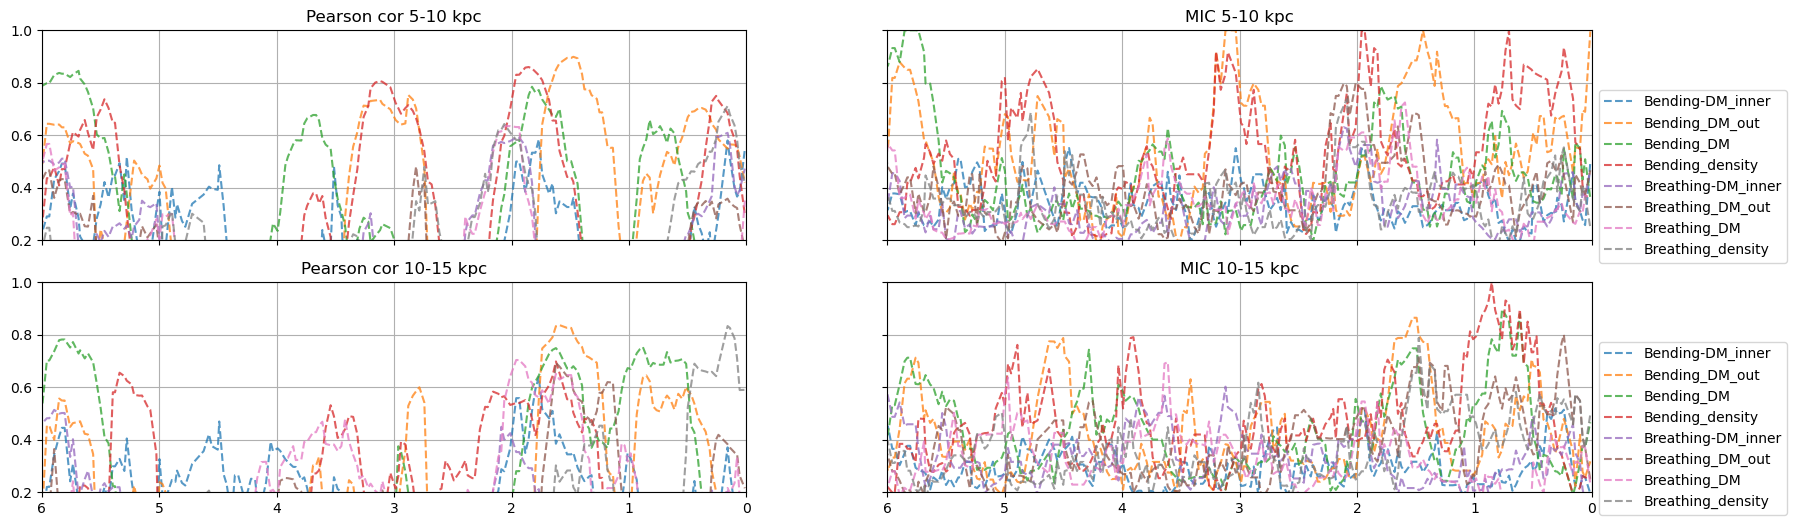

In [69]:

#window = 1
window = 0.8
#lookback = []

fig.subplots_adjust(hspace=0.15, wspace=0.1)
transp = 0.75
#for i, window in enumerate(windows):
variables = ["Bending", "Breathing", "density", "Gas","DM","DM_out", "DM_inner"]
rings = ["10", "15"]
correlations = {}
match = {}
MIC_data = {}

lookback = []
#generation of dictionary
for ring in rings:
    for var1 in variables:
        for var2 in variables:
            correlations[f"{var1}_{var2}_{ring}"] = []
            MIC_data[f"{var1}_{var2}_{ring}"] = []
            match[f"{var1}_{var2}_{ring}"] = []


for lb in df15["Lookback"]:
  #  print(lb)
    lookback.append(lb)
    df_w15 = df15[(df15["Lookback"]<lb + window/2)&(df15["Lookback"]>lb - window/2)]
    df_w10 = df10[(df10["Lookback"]<lb + window/2)&(df10["Lookback"]>lb - window/2)]
    #df_w5 = df5[(df5["Lookback"]<lb + window/2)&(df5["Lookback"]>lb - window/2)]
    for ring in rings:
        for var1 in variables:
            for var2 in variables:

                if ring == '10':
                    MIC_data[f"{var1}_{var2}_{ring}"].append(calculate_MIC (var1, var2, df_w10))
                    correlations[f"{var1}_{var2}_{ring}"].append(calculate_correlation (var1, var2, df_w10))
                    match[f"{var1}_{var2}_{ring}"].append(calculate_match (var1, var2, df_w10))
              #      match[f"{var1}_{var2}_{ring}"].append(calculate_match (var1, var2, df_w10))
                elif ring == '15':
                    MIC_data[f"{var1}_{var2}_{ring}"].append(calculate_MIC (var1, var2, df_w15))
                    correlations[f"{var1}_{var2}_{ring}"].append(calculate_correlation (var1, var2, df_w15))
                    match[f"{var1}_{var2}_{ring}"].append(calculate_match (var1, var2, df_w15))
             #       match[f"{var1}_{var2}_{ring}"].append(calculate_match (var1, var2, df_w15))

            

fig, ax = plt.subplots(len(rings),2, sharex=True, sharey=True,figsize = (20,6))          
for i, ring in enumerate(rings):            
    ax[i,0].plot(lookback,correlations[f"Bending_DM_inner_{ring}"],label = "Bending-DM_inner",ls  = "--", alpha =transp)
    ax[i,0].plot(lookback,correlations[f"Bending_DM_out_{ring}"],label = "Bending_DM_out",ls  = "--", alpha =transp)
    ax[i,0].plot(lookback,correlations[f"Bending_DM_{ring}"],label = "Bending_DM",ls  = "--", alpha =transp)
    ax[i,0].plot(lookback,correlations[f"Bending_density_{ring}"],label = "Bending_density",ls  = "--", alpha =transp)
    ax[i,0].plot(lookback,correlations[f"Breathing_DM_inner_{ring}"],label = "Breathing-DM_inner",ls  = "--", alpha =transp)
    ax[i,0].plot(lookback,correlations[f"Breathing_DM_out_{ring}"],label = "Breathing_DM_out",ls  = "--", alpha =transp)
    ax[i,0].plot(lookback,correlations[f"Breathing_DM_{ring}"],label = "Breathing_DM",ls  = "--", alpha =transp)
    ax[i,0].plot(lookback,correlations[f"Breathing_density_{ring}"],label = "Bending_density",ls  = "--", alpha =transp)





    ax[i,0].set_xlim(6,0)
    ax[i,0].set_ylim(0.2,1)
    ax[i,0].grid()
    #ax[0].legend(bbox_to_anchor = (1., 0.6))

    ax[i,1].plot(lookback,MIC_data[f"Bending_DM_inner_{ring}"],label = f"Bending-DM_inner",ls  = "--", alpha =transp)
    ax[i,1].plot(lookback,MIC_data[f"Bending_DM_out_{ring}"],label = f"Bending_DM_out",ls  = "--", alpha =transp)
    ax[i,1].plot(lookback,MIC_data[f"Bending_DM_{ring}"],label = f"Bending_DM",ls  = "--", alpha =transp)
    ax[i,1].plot(lookback,MIC_data[f"Bending_density_{ring}"],label = f"Bending_density",ls  = "--", alpha =transp)



    #ax.plot(lookback,cor_all_Z_10,label = "All-Z")
    ax[i,1].plot(lookback,MIC_data[f"Breathing_DM_inner_{ring}"],label = f"Breathing-DM_inner",ls  = "--", alpha =transp)
    ax[i,1].plot(lookback,MIC_data[f"Breathing_DM_out_{ring}"],label = f"Breathing_DM_out",ls  = "--", alpha =transp)
    ax[i,1].plot(lookback,MIC_data[f"Breathing_DM_{ring}"],label = f"Breathing_DM",ls  = "--", alpha =transp)
    ax[i,1].plot(lookback,MIC_data[f"Breathing_density_{ring}"],label = f"Breathing_density",ls  = "--", alpha =transp)
    ax[i,1].set_xlim(6,0)
    ax[i,1].set_ylim(0.2,1)
    ax[i,1].grid()
    ax[i,1].legend(bbox_to_anchor = (1., 0.75))
    #   ax[i,1].set_xlabel('Lookback [Gyr]', fontsize = 12)
    #ax[1].set_ylabel('Spearman cor', fontsize = 12)
    #plt.savefig(path_results +"correlactions_windows.png", dpi = 100, bbox_inches='tight', facecolor = "white" )
ax[0,0].set_title("Pearson cor 5-10 kpc")
ax[0,1].set_title("MIC 5-10 kpc")
ax[1,0].set_title("Pearson cor 10-15 kpc")
ax[1,1].set_title("MIC 10-15 kpc")

Text(0.5, 1.0, 'MIC 10-15 kpc')

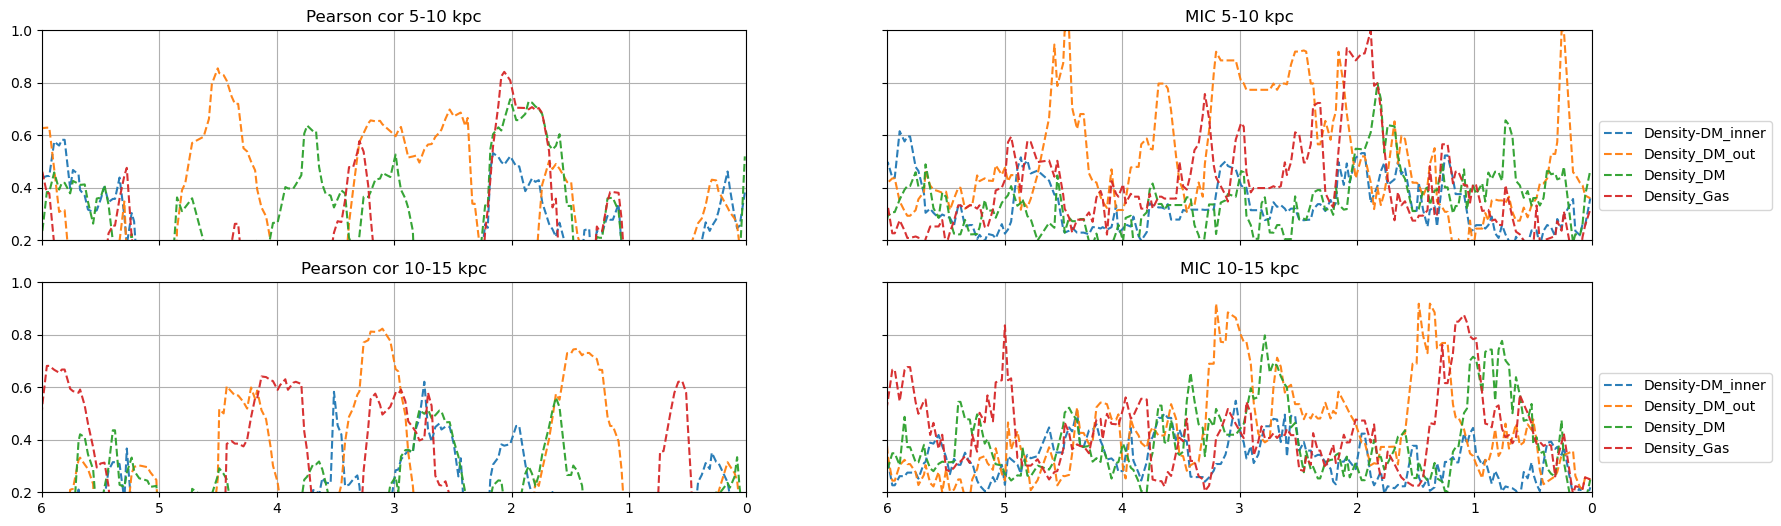

In [70]:
transp = 0.95
fig, ax = plt.subplots(len(rings),2, sharex=True, sharey=True,figsize = (20,6))          
for i, ring in enumerate(rings):            
    ax[i,0].plot(lookback,correlations[f"density_DM_inner_{ring}"],label = "Density-DM_inner",ls  = "--", alpha =transp)
    ax[i,0].plot(lookback,correlations[f"density_DM_out_{ring}"],label = "Density_DM_out",ls  = "--", alpha =transp)
    ax[i,0].plot(lookback,correlations[f"density_DM_{ring}"],label = "Density_DM",ls  = "--", alpha =transp)
    ax[i,0].plot(lookback,correlations[f"density_Gas_{ring}"],label = "Density_Gas",ls  = "--", alpha =transp)
 


   # ax[i,0].set_title(f"{window}Gyr Pearson cor {ring}")


    ax[i,0].set_xlim(6,0)
    ax[i,0].set_ylim(0.2,1)
    ax[i,0].grid()
    #ax[0].legend(bbox_to_anchor = (1., 0.6))

    ax[i,1].plot(lookback,MIC_data[f"density_DM_inner_{ring}"],label = "Density-DM_inner",ls  = "--", alpha =transp)
    ax[i,1].plot(lookback,MIC_data[f"density_DM_out_{ring}"],label = "Density_DM_out",ls  = "--", alpha =transp)
    ax[i,1].plot(lookback,MIC_data[f"density_DM_{ring}"],label = "Density_DM",ls  = "--", alpha =transp)
    ax[i,1].plot(lookback,MIC_data[f"density_Gas_{ring}"],label = "Density_Gas",ls  = "--", alpha =transp)


    ax[i,1].set_xlim(6,0)
    ax[i,1].set_ylim(0.2,1)
    ax[i,1].grid()
    ax[i,1].legend(bbox_to_anchor = (1., 0.6))
    #   ax[i,1].set_xlabel('Lookback [Gyr]', fontsize = 12)
    #ax[1].set_ylabel('Spearman cor', fontsize = 12)
    #plt.savefig(path_results +"correlactions_windows.png", dpi = 100, bbox_inches='tight', facecolor = "white" )
ax[0,0].set_title("Pearson cor 5-10 kpc")
ax[0,1].set_title("MIC 5-10 kpc")
ax[1,0].set_title("Pearson cor 10-15 kpc")
ax[1,1].set_title("MIC 10-15 kpc")

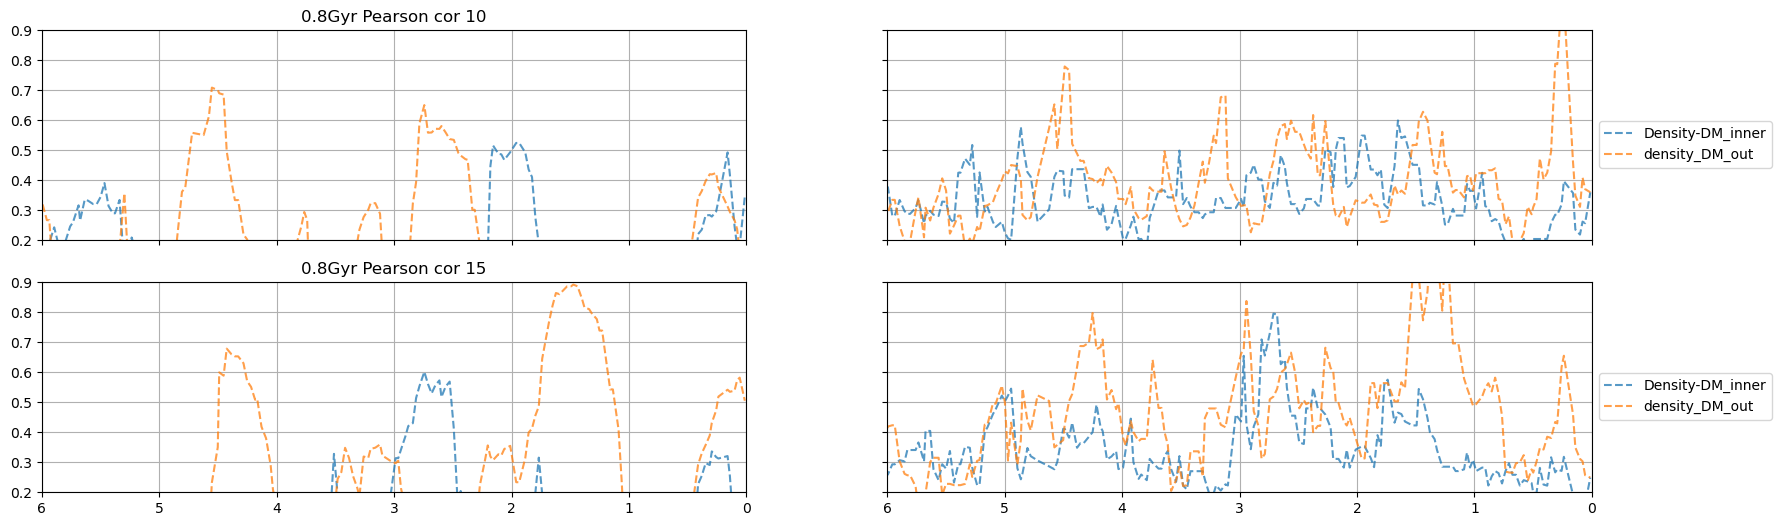

In [35]:

fig, ax = plt.subplots(len(rings),2, sharex=True, sharey=True,figsize = (20,6*len(windows)))          
for i, ring in enumerate(rings):            
    ax[i,0].plot(lookback,correlations[f"density_DM_inner_{ring}"],label = "density-DM_inner",ls  = "--", alpha =transp)
    ax[i,0].plot(lookback,correlations[f"density_DM_out_{ring}"],label = "density_DM_out",ls  = "--", alpha =transp)


    ax[i,0].set_title(f"{window}Gyr Pearson cor {ring}")


    ax[i,0].set_xlim(6,0)
    ax[i,0].set_ylim(0.2,0.9)
    ax[i,0].grid()
    #ax[0].legend(bbox_to_anchor = (1., 0.6))

    ax[i,1].plot(lookback,MIC_data[f"density_DM_inner_{ring}"],label = f"Density-DM_inner",ls  = "--", alpha =transp)
    ax[i,1].plot(lookback,MIC_data[f"density_DM_out_{ring}"],label = f"density_DM_out",ls  = "--", alpha =transp)

    ax[i,1].set_xlim(6,0)
    ax[i,1].set_ylim(0.2,0.9)
    ax[i,1].grid()
    ax[i,1].legend(bbox_to_anchor = (1., 0.6))
    #   ax[i,1].set_xlabel('Lookback [Gyr]', fontsize = 12)
    #ax[1].set_ylabel('Spearman cor', fontsize = 12)
    #plt.savefig(path_results +"correlactions_windows.png", dpi = 100, bbox_inches='tight', facecolor = "white" )

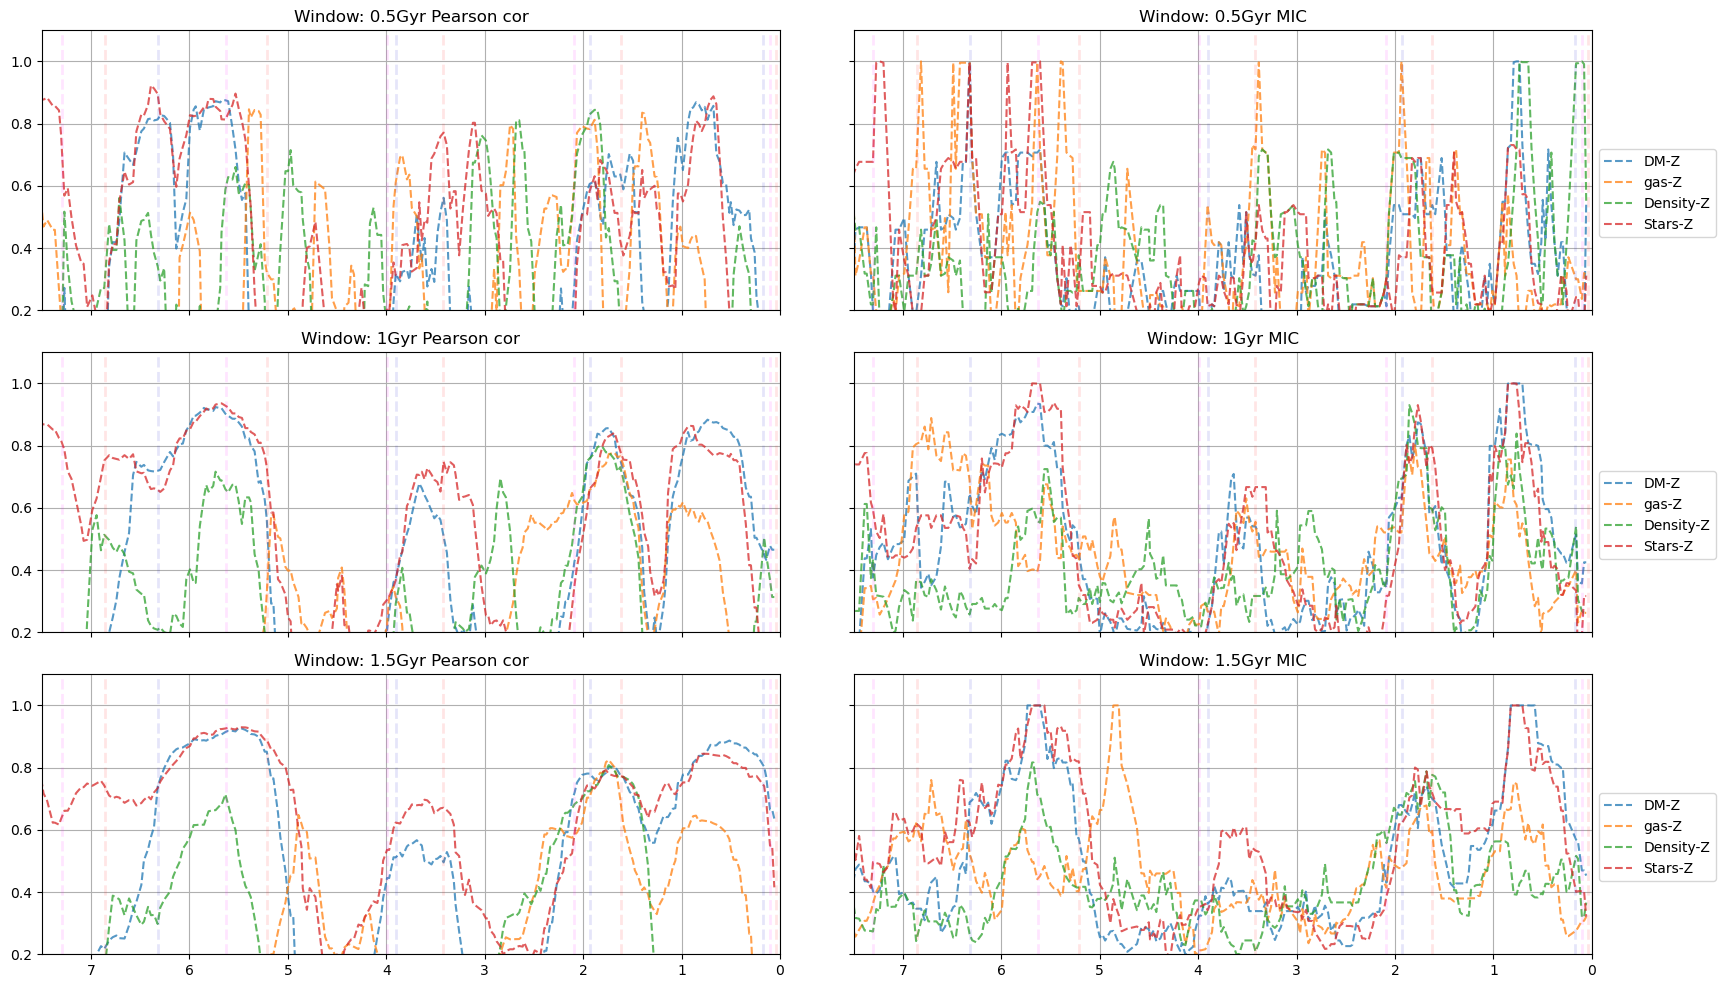

In [58]:
#variables = ["Z", "VZ", "density", "DM", "Gas","Stars","Satelites","All"]
#rings = ["5", "10", "15"]
#MIC_data = {}
#correlations = {}
#match = {}
#match = {}
#generation of dictionary
#for ring in rings:
#    for var1 in variables:
#        for var2 in variables:
#            MIC_data[f"{var1}_{var2}_{ring}"] = []
#            correlations[f"{var1}_{var2}_{ring}"] = []
#            match[f"{var1}_{var2}_{ring}"] = []
        #    match[f"{var1}_{var2}_{ring}"] = []
#window = 1
windows = [0.5,1,1.5]
#lookback = []

fig, ax = plt.subplots(len(windows),2, sharex=True, sharey=True,figsize = (20,4*len(windows)))
fig.subplots_adjust(hspace=0.15, wspace=0.1)
transp = 0.75
for i, window in enumerate(windows):
    variables = ["Z", "VZ", "density", "DM", "Gas","Stars","Satelites","All"]
    rings = ["5", "10", "15"]
    MIC_data = {}
    correlations = {}
    match = {}
    lookback = []
    #match = {}
    #generation of dictionary
    for ring in rings:
        for var1 in variables:
            for var2 in variables:
                MIC_data[f"{var1}_{var2}_{ring}"] = []
                correlations[f"{var1}_{var2}_{ring}"] = []
                match[f"{var1}_{var2}_{ring}"] = []
            #    match[f"{var1}_{var2}_{ring}"] = []
    for lb in df15["Lookback"]:
      #  print(lb)
        lookback.append(lb)
        df_w15 = df15[(df15["Lookback"]<lb + window/2)&(df15["Lookback"]>lb - window/2)]
        df_w10 = df10[(df10["Lookback"]<lb + window/2)&(df10["Lookback"]>lb - window/2)]
        df_w5 = df5[(df5["Lookback"]<lb + window/2)&(df5["Lookback"]>lb - window/2)]
        for ring in rings:
            for var1 in variables:
                for var2 in variables:
              #      print(f"calculatin in ring {ring}, variables {var1}, {var2}")
                    if ring == '5':
                        MIC_data[f"{var1}_{var2}_{ring}"].append(calculate_MIC (var1, var2, df_w5))
                        correlations[f"{var1}_{var2}_{ring}"].append(calculate_correlation (var1, var2, df_w5))
                        match[f"{var1}_{var2}_{ring}"].append(calculate_match (var1, var2, df_w5))
                   #     match[f"{var1}_{var2}_{ring}"].append(calculate_match (var1, var2, df_w5))
                    elif ring == '10':
                        MIC_data[f"{var1}_{var2}_{ring}"].append(calculate_MIC (var1, var2, df_w10))
                        correlations[f"{var1}_{var2}_{ring}"].append(calculate_correlation (var1, var2, df_w10))
                        match[f"{var1}_{var2}_{ring}"].append(calculate_match (var1, var2, df_w10))
                  #      match[f"{var1}_{var2}_{ring}"].append(calculate_match (var1, var2, df_w10))
                    elif ring == '15':
                        MIC_data[f"{var1}_{var2}_{ring}"].append(calculate_MIC (var1, var2, df_w15))
                        correlations[f"{var1}_{var2}_{ring}"].append(calculate_correlation (var1, var2, df_w15))
                        match[f"{var1}_{var2}_{ring}"].append(calculate_match (var1, var2, df_w15))
                 #       match[f"{var1}_{var2}_{ring}"].append(calculate_match (var1, var2, df_w15))


    ax[i,0].set_title(f"Window: {window}Gyr Pearson cor")
    #ax.plot(lookback,cor_all_Z_10,label = "All-Z")
    ax[i,0].plot(lookback,correlations["DM_Z_10"],label = "DM-Z",ls  = "--", alpha =transp)
    #ax[0].scatter(lookback,match["DM_Z_10"],marker = "x",label = "DM-Z")
    ax[i,0].plot(lookback,correlations["Gas_Z_10"],label = "gas-Z",ls  = "--", alpha =transp)
    #ax[0].scatter(lookback,match["Gas_Z_10"],marker = "x",label = "Gas-Z")
    ax[i,0].plot(lookback,correlations["density_Z_10"],label = "Density-Z",ls  = "--", alpha =transp)
    #ax[0].scatter(lookback,match["density_Z_10"],marker = "x",label = "Density-Z")
    ax[i,0].plot(lookback,correlations["Stars_Z_10"],label = "Stars-Z",ls  = "--", alpha =transp)
    #ax[0].scatter(lookback,match["Stars_Z_10"],marker = "x",label = "Stars-Z")

    ax[i,0].set_xlim(7.5,0)
    ax[i,0].set_ylim(0.2,1.1)
    ax[i,0].grid()
    #ax[0].legend(bbox_to_anchor = (1., 0.6))
    add_satellites(ax[i,0])
    ax[i,1].set_title(f"Window: {window}Gyr MIC")
    ax[i,1].plot(lookback,MIC_data["DM_Z_10"],label = "DM-Z",ls  = "--", alpha =transp)
    #ax[1].scatter(lookback,match["DM_Z_15"],marker = "x",label = "DM-Z")
    ax[i,1].plot(lookback,MIC_data["Gas_Z_10"],label = "gas-Z",ls  = "--", alpha =transp)
    #ax[1].scatter(lookback,match["Gas_Z_15"],marker = "x",label = "Gas-Z")
    ax[i,1].plot(lookback,MIC_data["density_Z_10"],label = "Density-Z",ls  = "--", alpha =transp)
    ax[i,1].plot(lookback,MIC_data["Stars_Z_10"],label = "Stars-Z",ls  = "--", alpha =transp)


    ax[i,1].set_xlim(7.5,0)
    ax[i,1].set_ylim(0.2,1.1)
    add_satellites(ax[i,1])
    ax[i,1].grid()
    ax[i,1].legend(bbox_to_anchor = (1., 0.6))
 #   ax[i,1].set_xlabel('Lookback [Gyr]', fontsize = 12)
    #ax[1].set_ylabel('Spearman cor', fontsize = 12)
plt.savefig(path_results +"correlactions_windows.png", dpi = 100, bbox_inches='tight', facecolor = "white" )

224
224


Text(0.5, 0, 'Lookback [Gyr]')

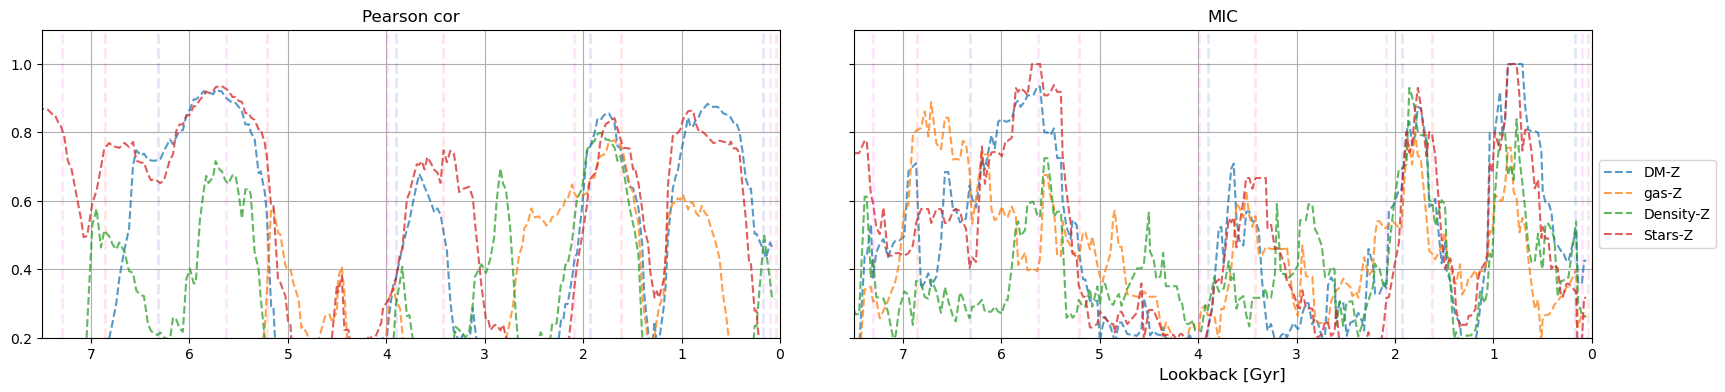

In [53]:
fig, ax = plt.subplots(len(windows),2, sharex=True, sharey=True,figsize = (20,4))
fig.subplots_adjust(hspace=0.15, wspace=0.1)
transp = 0.75
ax[0].set_title("Pearson cor")
#ax.plot(lookback,cor_all_Z_10,label = "All-Z")
ax[0].plot(lookback,correlations["DM_Z_10"],label = "DM-Z",ls  = "--", alpha =transp)
#ax[0].scatter(lookback,match["DM_Z_10"],marker = "x",label = "DM-Z")
ax[0].plot(lookback,correlations["Gas_Z_10"],label = "gas-Z",ls  = "--", alpha =transp)
#ax[0].scatter(lookback,match["Gas_Z_10"],marker = "x",label = "Gas-Z")
ax[0].plot(lookback,correlations["density_Z_10"],label = "Density-Z",ls  = "--", alpha =transp)
#ax[0].scatter(lookback,match["density_Z_10"],marker = "x",label = "Density-Z")
ax[0].plot(lookback,correlations["Stars_Z_10"],label = "Stars-Z",ls  = "--", alpha =transp)
#ax[0].scatter(lookback,match["Stars_Z_10"],marker = "x",label = "Stars-Z")

ax[0].set_xlim(7.5,0)
ax[0].set_ylim(0.2,1.1)
ax[0].grid()
#ax[0].legend(bbox_to_anchor = (1., 0.6))
add_satellites(ax[0])
ax[1].set_title("MIC")
ax[1].plot(lookback,MIC_data["DM_Z_10"],label = "DM-Z",ls  = "--", alpha =transp)
#ax[1].scatter(lookback,match["DM_Z_15"],marker = "x",label = "DM-Z")
ax[1].plot(lookback,MIC_data["Gas_Z_10"],label = "gas-Z",ls  = "--", alpha =transp)
#ax[1].scatter(lookback,match["Gas_Z_15"],marker = "x",label = "Gas-Z")
ax[1].plot(lookback,MIC_data["density_Z_10"],label = "Density-Z",ls  = "--", alpha =transp)
ax[1].plot(lookback,MIC_data["Stars_Z_10"],label = "Stars-Z",ls  = "--", alpha =transp)
#ax[1].scatter(lookback,match["density_Z_15"],marker = "x",label = "density-Z")

ax[1].set_xlim(7.5,0)
ax[1].set_ylim(0.2,1.1)
add_satellites(ax[1])
ax[1].grid()
ax[1].legend(bbox_to_anchor = (1., 0.6))
ax[1].set_xlabel('Lookback [Gyr]', fontsize = 12)
#ax[1].set_ylabel('Spearman cor', fontsize = 12)
#plt.show()   
#plt.savefig("results/correlations_Z.png", dpi = 100, facecolor = "white")

Text(0, 0.5, 'Spearman cor')

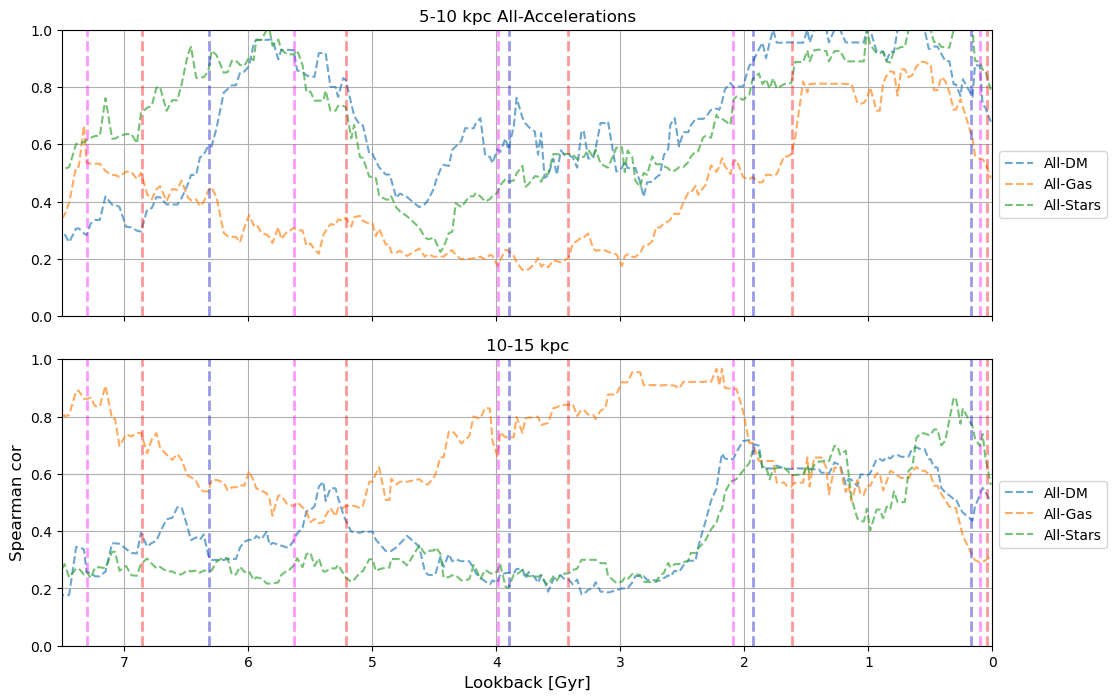

In [15]:
fig, ax = plt.subplots(2,1, sharex=True, sharey=True,figsize = (12,8))
fig.subplots_adjust(hspace=0.15, wspace=0)

ax[0].set_title("5-10 kpc All-Accelerations")
#ax.plot(lookback,cor_all_Z_10,label = "All-Z")
ax[0].plot(lookback,MIC_data["All_DM_10"],label = "All-DM",ls  = "--", alpha =0.65)
#ax[0].scatter(lookback,match["All_DM_10"],marker = "x",label = "All-DM")
ax[0].plot(lookback,MIC_data["All_Gas_10"],label = "All-Gas",ls  = "--", alpha =0.65)
#ax[0].scatter(lookback,match["All_Gas_10"],marker = "x",label = "All-Gas")
ax[0].plot(lookback,MIC_data["All_Stars_10"],label = "All-Stars",ls  = "--", alpha =0.65)
#ax[0].scatter(lookback,match["All_Stars_10"],marker = "x",label = "All-Stars")


#ax[0].scatter(lookback,match["All_Stars_10"],marker = "x",label = "All-Stars")



ax[0].set_xlim(7.5,0)
ax[0].set_ylim(0,1)
ax[0].grid()
ax[0].legend(bbox_to_anchor = (1., 0.6))
add_satellites(ax[0])
ax[1].set_title("10-15 kpc")
ax[1].plot(lookback,MIC_data["All_DM_15"],label = "All-DM",ls  = "--", alpha =0.65)
#ax[1].scatter(lookback,match["All_DM_15"],marker = "x",label = "All-DM")
ax[1].plot(lookback,MIC_data["All_Gas_15"],label = "All-Gas",ls  = "--", alpha =0.65)
#ax[1].scatter(lookback,match["All_Gas_15"],marker = "x",label = "All-Gas")
ax[1].plot(lookback,MIC_data["All_Stars_15"],label = "All-Stars",ls  = "--", alpha =0.65)
#ax[1].scatter(lookback,match["All_Stars_15"],marker = "x",label = "All-Stars")

ax[1].set_xlim(7.5,0)
ax[1].set_ylim(0,1)
add_satellites(ax[1])
ax[1].grid()
ax[1].legend(bbox_to_anchor = (1., 0.6))
ax[1].set_xlabel('Lookback [Gyr]', fontsize = 12)
ax[1].set_ylabel('Spearman cor', fontsize = 12)


#plt.show()   
#plt.savefig("results/correlations_Z.png", dpi = 100, facecolor = "white")

In [70]:
len(lookback)

224

In [68]:
#epoch 1
#Epoch 1
lookback = np.array(df15 ["Lookback"])
cortes = [0.3, 2.3, 4.8, 6.7]
indr=np.digitize(lookback,cortes)
print(indr)
      
epoch1_15 = df15.loc[indr==2]
epoch1_10 = df10.loc[indr==2]
epoch1_5 = df5.loc[indr==2]



[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0
 0 0]


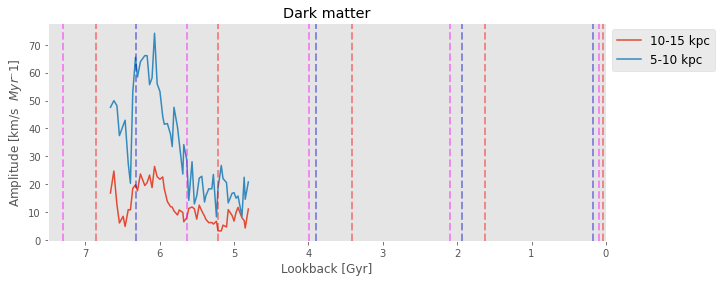

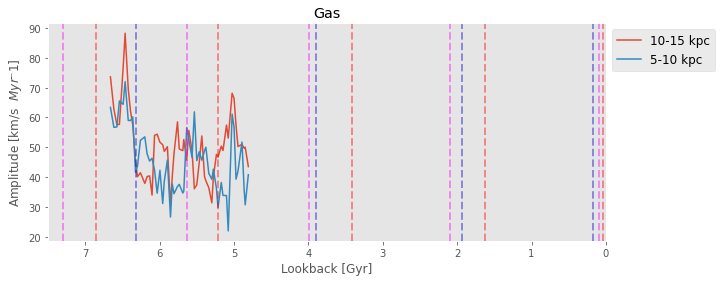

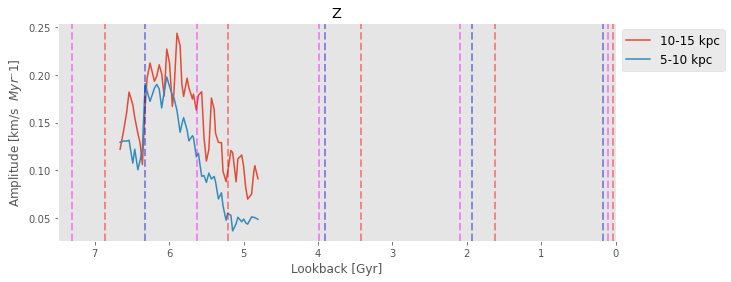

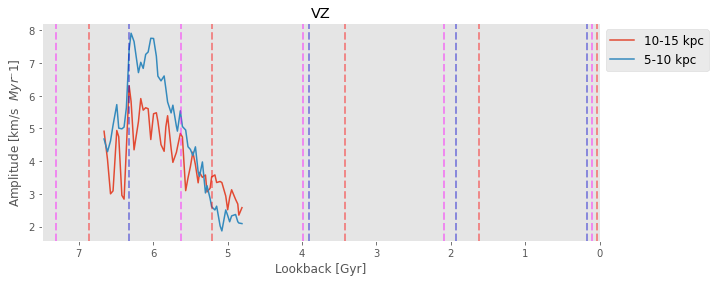

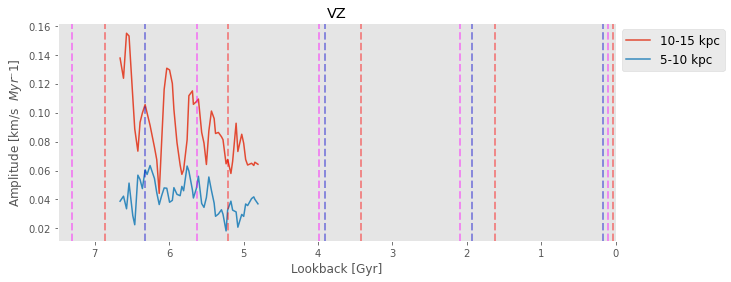

In [54]:
fig, ax = plt.subplots(figsize = (10,4))
plt.title("Dark matter")
ax.plot(epoch1_15["Lookback"],epoch1_15["DM"], label = "10-15 kpc")
ax.plot(epoch1_10["Lookback"],epoch1_10["DM"],label = "5-10 kpc")
#ax.plot(lookback,np.array(ac_dm_estimator_5)*seconds_to_Myr,label = "0-5 kpc")
#ax.plot(resim["Snapshot"], resim["Npart"], color = "blue", label = "resimulacion")
ax.set_xlabel('Lookback [Gyr]', fontsize = 12)
ax.set_ylabel('Amplitude [km/s  $Myr{⁻1}$]', fontsize = 12)
ax.grid()
ax.set_xlim(7.5,0)
ax.legend(fontsize = 12, bbox_to_anchor=(1, 1))
add_satellites(ax)
#fig.savefig("test.png")
#plt.savefig("results/DM_shells.png", dpi = 100,  bbox_inches='tight', facecolor = "white")
plt.show()


fig, ax = plt.subplots(figsize = (10,4))
plt.title("Gas")
ax.plot(epoch1_15["Lookback"],epoch1_15["Gas"], label = "10-15 kpc")
ax.plot(epoch1_10["Lookback"],epoch1_10["Gas"],label = "5-10 kpc")
#ax.plot(lookback,np.array(ac_dm_estimator_5)*seconds_to_Myr,label = "0-5 kpc")
#ax.plot(resim["Snapshot"], resim["Npart"], color = "blue", label = "resimulacion")
ax.set_xlabel('Lookback [Gyr]', fontsize = 12)
ax.set_ylabel('Amplitude [km/s  $Myr{⁻1}$]', fontsize = 12)
ax.grid()
ax.set_xlim(7.5,0)
ax.legend(fontsize = 12, bbox_to_anchor=(1, 1))
add_satellites(ax)
#fig.savefig("test.png")
#plt.savefig("results/DM_shells.png", dpi = 100,  bbox_inches='tight', facecolor = "white")
plt.show()



fig, ax = plt.subplots(figsize = (10,4))
plt.title("Z")
ax.plot(epoch1_15["Lookback"],epoch1_15["Z"], label = "10-15 kpc")
ax.plot(epoch1_10["Lookback"],epoch1_10["Z"],label = "5-10 kpc")
#ax.plot(lookback,np.array(ac_dm_estimator_5)*seconds_to_Myr,label = "0-5 kpc")
#ax.plot(resim["Snapshot"], resim["Npart"], color = "blue", label = "resimulacion")
ax.set_xlabel('Lookback [Gyr]', fontsize = 12)
ax.set_ylabel('Amplitude [km/s  $Myr{⁻1}$]', fontsize = 12)
ax.grid()
ax.set_xlim(7.5,0)
ax.legend(fontsize = 12, bbox_to_anchor=(1, 1))
add_satellites(ax)
#fig.savefig("test.png")
#plt.savefig("results/DM_shells.png", dpi = 100,  bbox_inches='tight', facecolor = "white")
plt.show()


fig, ax = plt.subplots(figsize = (10,4))
plt.title("VZ")
ax.plot(epoch1_15["Lookback"],epoch1_15["VZ"], label = "10-15 kpc")
ax.plot(epoch1_10["Lookback"],epoch1_10["VZ"],label = "5-10 kpc")
#ax.plot(lookback,np.array(ac_dm_estimator_5)*seconds_to_Myr,label = "0-5 kpc")
#ax.plot(resim["Snapshot"], resim["Npart"], color = "blue", label = "resimulacion")
ax.set_xlabel('Lookback [Gyr]', fontsize = 12)
ax.set_ylabel('Amplitude [km/s  $Myr{⁻1}$]', fontsize = 12)
ax.grid()
ax.set_xlim(7.5,0)
ax.legend(fontsize = 12, bbox_to_anchor=(1, 1))
add_satellites(ax)
#fig.savefig("test.png")
#plt.savefig("results/DM_shells.png", dpi = 100,  bbox_inches='tight', facecolor = "white")
plt.show()


fig, ax = plt.subplots(figsize = (10,4))
plt.title("VZ")
ax.plot(epoch1_15["Lookback"],epoch1_15["density"], label = "10-15 kpc")
ax.plot(epoch1_10["Lookback"],epoch1_10["density"],label = "5-10 kpc")
#ax.plot(lookback,np.array(ac_dm_estimator_5)*seconds_to_Myr,label = "0-5 kpc")
#ax.plot(resim["Snapshot"], resim["Npart"], color = "blue", label = "resimulacion")
ax.set_xlabel('Lookback [Gyr]', fontsize = 12)
ax.set_ylabel('Amplitude [km/s  $Myr{⁻1}$]', fontsize = 12)
ax.grid()
ax.set_xlim(7.5,0)
ax.legend(fontsize = 12, bbox_to_anchor=(1, 1))
add_satellites(ax)
#fig.savefig("test.png")
#plt.savefig("results/DM_shells.png", dpi = 100,  bbox_inches='tight', facecolor = "white")
plt.show()


In [8]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')

# Preprocesado y modelado
# ==============================================================================
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [31]:
epoch1_15.drop('All', inplace=True, axis=1)
epoch1_10.drop('All', inplace=True, axis=1)

In [100]:
def apply_pca (datos, lookback):
   # datos = data.drop('All', inplace=True, axis=1)
  #  datos = epoch1_10
    # Entrenamiento modelo PCA con escalado de los datos
    # ==============================================================================
    pca_pipe = make_pipeline(StandardScaler(), PCA())
    pca_pipe.fit(datos)

    # Se extrae el modelo entrenado del pipeline
    modelo_pca = pca_pipe.named_steps['pca']


    # Se combierte el array a dataframe para añadir nombres a los ejes.
    result = pd.DataFrame(
        data    = modelo_pca.components_,
        columns = datos.columns,
        index   = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6']
    )

#    print(modelo_pca.components_)
    # Heatmap componentes
    # ==============================================================================
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 2))
    componentes = modelo_pca.components_
    plt.imshow(componentes.T, cmap='viridis', aspect='auto')
    plt.yticks(range(len(datos.columns)), datos.columns)
    plt.xticks(range(len(datos.columns)), np.arange(modelo_pca.n_components_) + 1)
    plt.grid(False)
    plt.colorbar();

    # Porcentaje de varianza explicada acumulada
    # ==============================================================================
    prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()
    print('------------------------------------------')
    print('Porcentaje de varianza explicada acumulada')
    print('------------------------------------------')
    print(prop_varianza_acum)

    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
    ax.plot(
        np.arange(len(datos.columns)) + 1,
        prop_varianza_acum,
        marker = 'o'
    )

    for x, y in zip(np.arange(len(datos.columns)) + 1, prop_varianza_acum):
        label = round(y, 2)
        ax.annotate(
            label,
            (x,y),
            textcoords="offset points",
            xytext=(0,10),
            ha='center'
        )

    ax.set_ylim(0, 1.1)
    ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
    ax.set_title('Porcentaje de varianza explicada acumulada')
    ax.set_xlabel('Componente principal')
    ax.set_ylabel('Por. varianza acumulada');

    
    pca = PCA(n_components=3)
    principalComponents = pca.fit_transform(datos)
    principalDf = pd.DataFrame(data = principalComponents
                 , columns = ['PC1', 'PC2', 'PC3'])
    fig = plt.figure(figsize = (8,6))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)
   # ax.set_title('2 component PCA', fontsize = 20)
    ll =   ax.scatter(principalDf.loc[:,'PC1'], principalDf.loc[:, 'PC2'], c = lookback, cmap = "jet")
    plt.colorbar(ll,label=  "Lookback")

    fig = plt.figure(figsize = (8,6))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel('Principal Component 2', fontsize = 15)
    ax.set_ylabel('Principal Component 3', fontsize = 15)
  #  ax.set_title('2 component PCA', fontsize = 20)
    ll = ax.scatter(principalDf.loc[:,'PC2'], principalDf.loc[:, 'PC3'], c = lookback,  cmap = "jet")
    plt.colorbar(ll,label=  "Lookback")
    #cbar = fig.colorbar(ll, cax=ax,  label=  "Lookback")
    
    fig = plt.figure(figsize = (8,6))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 3', fontsize = 15)
  #  ax.set_title('2 component PCA', fontsize = 20)
    ll = ax.scatter(principalDf.loc[:,'PC1'], principalDf.loc[:, 'PC3'], c = lookback, cmap = "jet")
    plt.colorbar(ll,label=  "Lookback")
    #cbar = fig.colorbar(ll, cax=ax,  label=  "Lookback")
    

In [69]:
epoch1_15 = df15.loc[indr==3]
epoch1_10 = df10.loc[indr==3]
epoch1_5 = df5.loc[indr==3]

epoch1_15.drop('All', inplace=True, axis=1)
epoch1_10.drop('All', inplace=True, axis=1)

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.6289125  0.79671543 0.88002707 0.94809298 0.97002922 0.98609625
 0.99724369 1.        ]


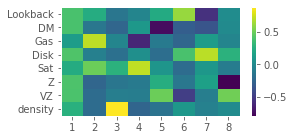

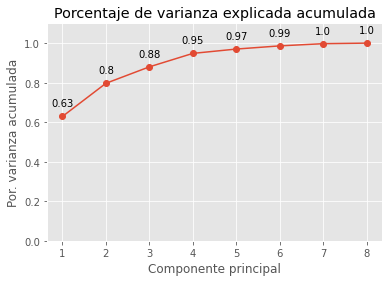

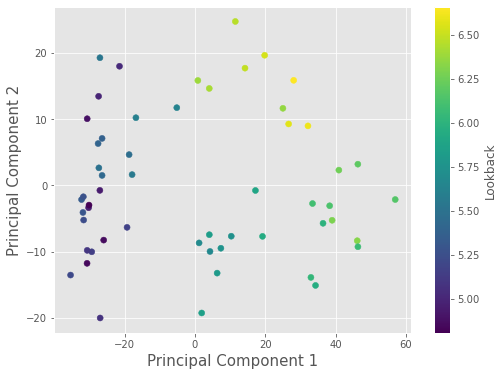

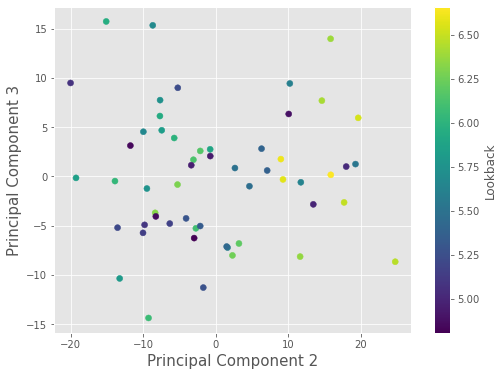

In [70]:
apply_pca (epoch1_10)

In [65]:
epoch2_15 = df15.loc[indr==1]
epoch2_10 = df10.loc[indr==1]
epoch2_5 = df5.loc[indr==1]

epoch2_15.drop('All', inplace=True, axis=1)
epoch2_10.drop('All', inplace=True, axis=1)

In [71]:
epoch3_15 = df15.loc[indr==1]
epoch3_10 = df10.loc[indr==1]
epoch3_5 = df5.loc[indr==1]

epoch3_15.drop('All', inplace=True, axis=1)
epoch3_10.drop('All', inplace=True, axis=1)

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.47277262 0.74988858 0.83905416 0.90523703 0.94895387 0.97002896
 0.98856653 1.        ]


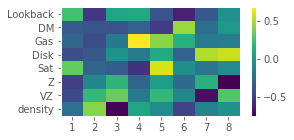

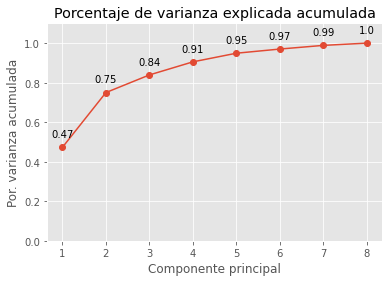

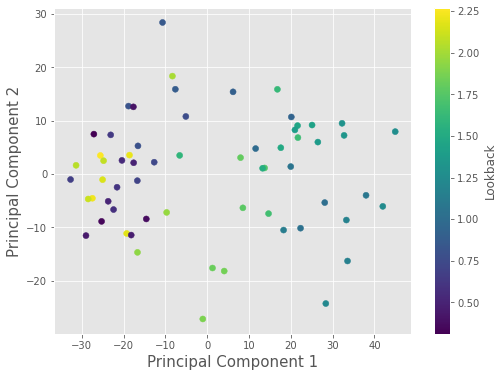

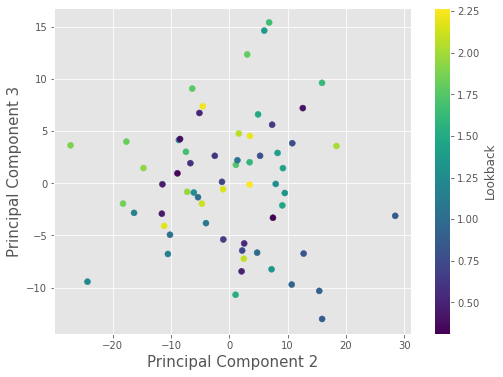

In [72]:
apply_pca (epoch3_10)

In [98]:
epoch_all_15 = df15.copy()
epoch_all_10 = df10.copy()
epoch_all_15.drop('All', inplace=True, axis=1)
epoch_all_10.drop('All', inplace=True, axis=1)

epoch_all_15.drop('Lookback', inplace=True, axis=1)
epoch_all_10.drop('Lookback', inplace=True, axis=1)
epoch_all_15.drop('Disk', inplace=True, axis=1)
epoch_all_10.drop('Disk', inplace=True, axis=1)

In [88]:
df15

Lookback         All         DM        Gas       Disk       Sat  \
0    7.641375  106.202469  40.023762  66.178707  15.049670  0.024477   
1    7.596713   80.973760  35.507212  45.466547  17.795416  0.033394   
2    7.566684   53.800446  25.542967  28.257479  19.137192  0.041124   
3    7.533391   52.556993  35.062158  17.494836  15.813274  0.051349   
4    7.482980   64.839175  27.685772  37.153402  13.509964  0.066845   
..        ...         ...        ...        ...        ...       ...   
219  0.160155   40.722998  12.924697  27.798301  12.136108  0.545639   
220  0.140454   39.377830  13.089089  26.288741  13.279948  0.541135   
221  0.100925   37.512495  12.950851  24.561643  11.939660  0.493460   
222  0.079098   46.856131  16.516670  30.339461  13.281444  0.449974   
223  0.057232   41.617075   9.505844  32.111231  12.897071  0.400456   

            Z         VZ   density  
0    0.429847  13.346531  0.161309  
1    0.516910  11.069785  0.155225  
2    0.500485   9.681947  0.197279  
3    0.470980  10.109497  0.201293  
4    0.356758  11.589737  0.130261  
..        ...        ...       ...  
219  0.128515   2.298540  0.565066  
220  0.121384   1.972196  0.598089  
221  0.091059   2.582888  0.574378  
222  0.100693   2.903617  0.571380  
223  0.131195   2.925740  0.577363  

[224 rows x 9 columns]

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.44124784 0.6165554  0.78919668 0.9163627  0.98981995 1.        ]


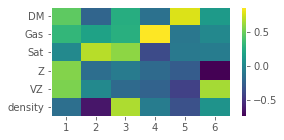

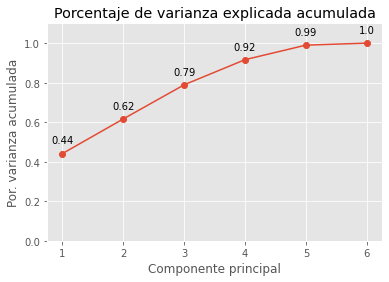

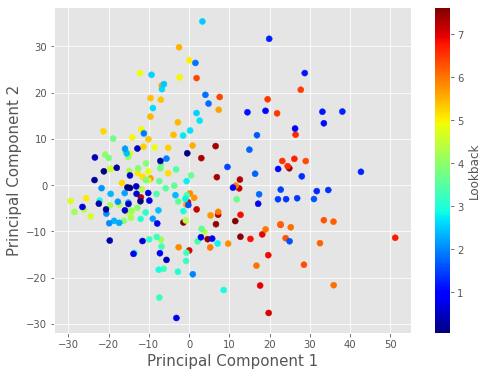

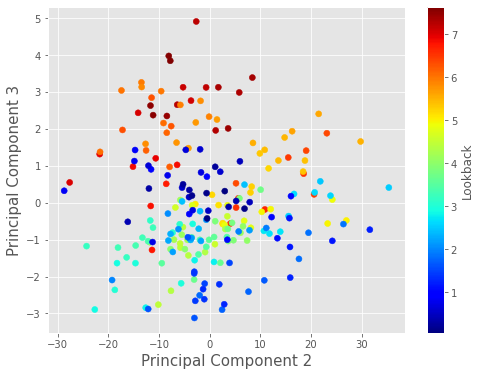

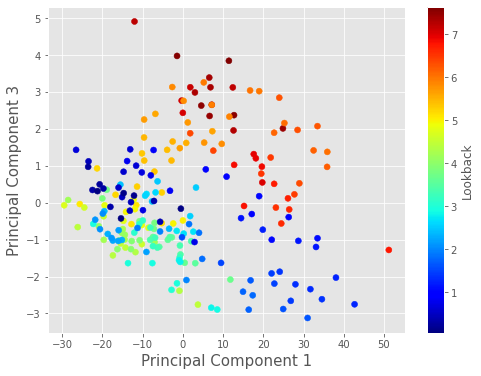

In [103]:
apply_pca (epoch_all_10, np.array(df15["Lookback"]))

[[-4.10449544e-01 -3.87043317e-01 -6.81646080e-05 -4.31854528e-01
  -8.57603173e-02 -4.51988942e-01 -4.31906739e-01 -3.11509289e-01]
 [-4.43703084e-02  1.39596155e-01  6.87237338e-01  7.30979749e-02
   6.61841170e-01 -8.54406276e-02 -2.94383376e-02 -2.33891568e-01]
 [-2.82822914e-02 -1.07378673e-01 -2.09163177e-01 -2.71421872e-01
   5.08937595e-01 -1.85733495e-01 -5.82807536e-02  7.57192058e-01]
 [-3.27782291e-01  3.00835088e-01 -6.52577487e-01  1.24222094e-01
   4.50630142e-01  6.08951431e-02  4.57057003e-02 -3.89748329e-01]
 [ 4.48836642e-01 -7.56695326e-01 -1.82336814e-01  1.98823852e-01
   2.90050011e-01  1.04417362e-01  5.52189369e-02 -2.34731950e-01]
 [ 5.12278147e-01  3.13855218e-01 -1.28222447e-01  2.08216928e-01
   1.04270177e-02 -2.30630049e-01 -7.25050785e-01 -1.65268002e-02]
 [ 5.07374528e-01  2.39969810e-01 -8.26791068e-02 -6.61291732e-01
   4.03930819e-02 -2.08429083e-01  3.59820876e-01 -2.57483285e-01]
 [ 3.03082394e-03  1.72058681e-04  3.96822468e-02 -4.45943296e-01
   

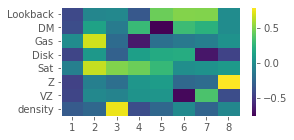

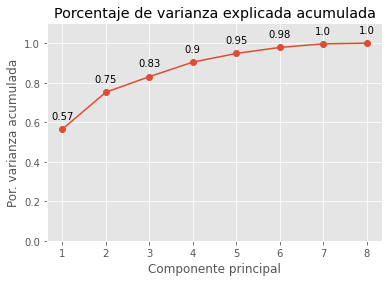

In [10]:
epoch1_10.drop('All', inplace=True, axis=1)
datos = epoch1_10
# Entrenamiento modelo PCA con escalado de los datos
# ==============================================================================
pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(datos)

# Se extrae el modelo entrenado del pipeline
modelo_pca = pca_pipe.named_steps['pca']


# Se combierte el array a dataframe para añadir nombres a los ejes.
result = pd.DataFrame(
    data    = modelo_pca.components_,
    columns = datos.columns,
    index   = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6','PC7', 'PC8']
)

print(modelo_pca.components_)
# Heatmap componentes
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 2))
componentes = modelo_pca.components_
plt.imshow(componentes.T, cmap='viridis', aspect='auto')
plt.yticks(range(len(datos.columns)), datos.columns)
plt.xticks(range(len(datos.columns)), np.arange(modelo_pca.n_components_) + 1)
plt.grid(False)
plt.colorbar();

# Porcentaje de varianza explicada acumulada
# ==============================================================================
prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.plot(
    np.arange(len(datos.columns)) + 1,
    prop_varianza_acum,
    marker = 'o'
)

for x, y in zip(np.arange(len(datos.columns)) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
    
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada');

In [42]:
modelo_pca.__dict__.keys()

dict_keys(['n_components', 'copy', 'whiten', 'svd_solver', 'tol', 'iterated_power', 'random_state', 'n_features_in_', '_fit_svd_solver', 'mean_', 'noise_variance_', 'n_samples_', 'n_features_', 'components_', 'n_components_', 'explained_variance_', 'explained_variance_ratio_', 'singular_values_'])

In [15]:
print(modelo_pca.explained_variance_)

[4.57737964 1.51222796 0.63815823 0.59551163 0.35541181 0.24654944
 0.14660789 0.02941922]


In [26]:
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(datos)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC1', 'PC2', 'PC3'])

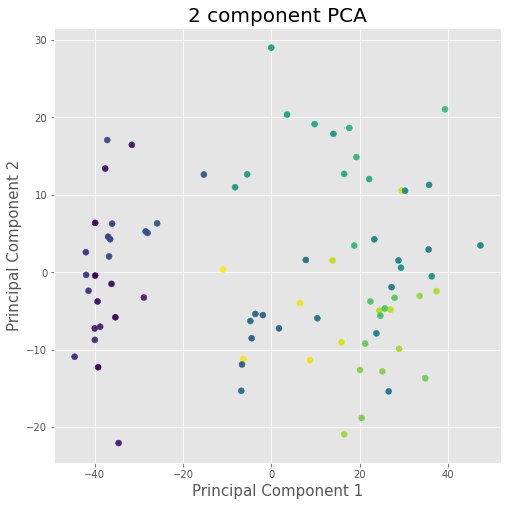

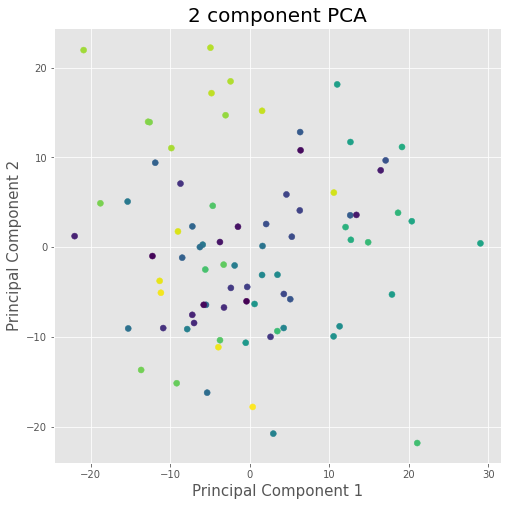

In [27]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
ax.scatter(principalDf.loc[:,'PC1'], principalDf.loc[:, 'PC2'], c = datos["Lookback"])

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
ax.scatter(principalDf.loc[:,'PC2'], principalDf.loc[:, 'PC3'], c = datos["Lookback"])


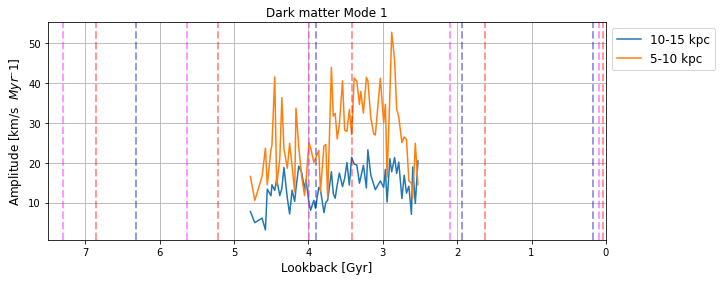

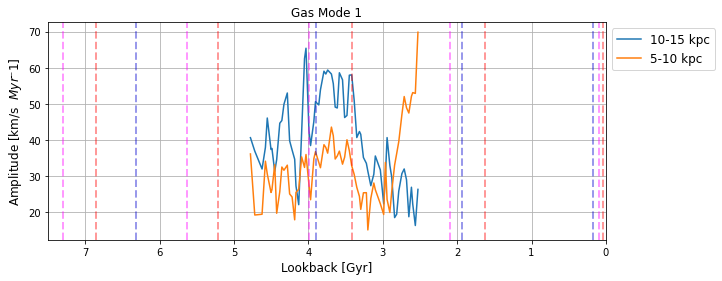

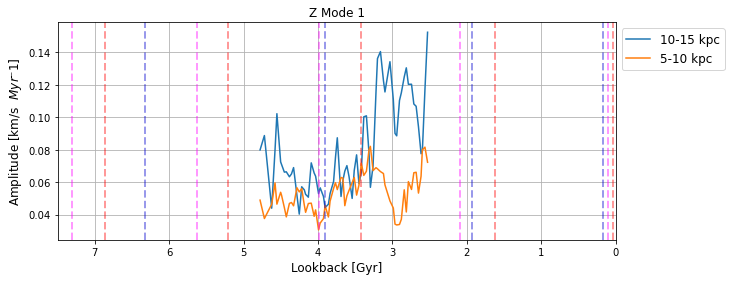

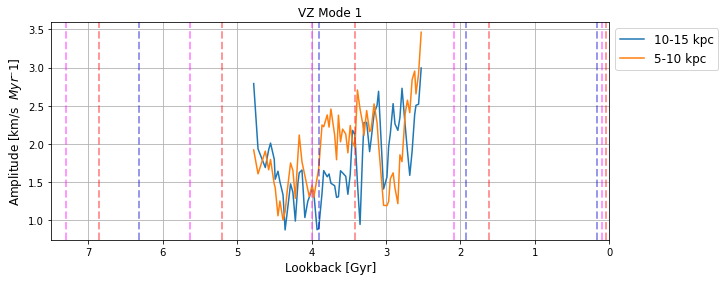

In [11]:
#Epoch 2
      
epoch2_15 = df15.loc[indr==1]
epoch2_10 = df10.loc[indr==1]
epoch2_5 = df5.loc[indr==1]


fig, ax = plt.subplots(figsize = (10,4))
plt.title("Dark matter Mode 1")
ax.plot(epoch2_15["Lookback"],epoch2_15["DM"], label = "10-15 kpc")
ax.plot(epoch2_10["Lookback"],epoch2_10["DM"],label = "5-10 kpc")
#ax.plot(lookback,np.array(ac_dm_estimator_5)*seconds_to_Myr,label = "0-5 kpc")
#ax.plot(resim["Snapshot"], resim["Npart"], color = "blue", label = "resimulacion")
ax.set_xlabel('Lookback [Gyr]', fontsize = 12)
ax.set_ylabel('Amplitude [km/s  $Myr{⁻1}$]', fontsize = 12)
ax.grid()
ax.set_xlim(7.5,0)
ax.legend(fontsize = 12, bbox_to_anchor=(1, 1))
add_satellites(ax)
#fig.savefig("test.png")
#plt.savefig("results/DM_shells.png", dpi = 100,  bbox_inches='tight', facecolor = "white")
plt.show()


fig, ax = plt.subplots(figsize = (10,4))
plt.title("Gas Mode 1")
ax.plot(epoch2_15["Lookback"],epoch2_15["Gas"], label = "10-15 kpc")
ax.plot(epoch2_10["Lookback"],epoch2_10["Gas"],label = "5-10 kpc")
#ax.plot(lookback,np.array(ac_dm_estimator_5)*seconds_to_Myr,label = "0-5 kpc")
#ax.plot(resim["Snapshot"], resim["Npart"], color = "blue", label = "resimulacion")
ax.set_xlabel('Lookback [Gyr]', fontsize = 12)
ax.set_ylabel('Amplitude [km/s  $Myr{⁻1}$]', fontsize = 12)
ax.grid()
ax.set_xlim(7.5,0)
ax.legend(fontsize = 12, bbox_to_anchor=(1, 1))
add_satellites(ax)
#fig.savefig("test.png")
#plt.savefig("results/DM_shells.png", dpi = 100,  bbox_inches='tight', facecolor = "white")
plt.show()



fig, ax = plt.subplots(figsize = (10,4))
plt.title("Z Mode 1")
ax.plot(epoch2_15["Lookback"],epoch2_15["Z"], label = "10-15 kpc")
ax.plot(epoch2_10["Lookback"],epoch2_10["Z"],label = "5-10 kpc")
#ax.plot(lookback,np.array(ac_dm_estimator_5)*seconds_to_Myr,label = "0-5 kpc")
#ax.plot(resim["Snapshot"], resim["Npart"], color = "blue", label = "resimulacion")
ax.set_xlabel('Lookback [Gyr]', fontsize = 12)
ax.set_ylabel('Amplitude [km/s  $Myr{⁻1}$]', fontsize = 12)
ax.grid()
ax.set_xlim(7.5,0)
ax.legend(fontsize = 12, bbox_to_anchor=(1, 1))
add_satellites(ax)
#fig.savefig("test.png")
#plt.savefig("results/DM_shells.png", dpi = 100,  bbox_inches='tight', facecolor = "white")
plt.show()


fig, ax = plt.subplots(figsize = (10,4))
plt.title("VZ Mode 1")
ax.plot(epoch2_15["Lookback"],epoch2_15["VZ"], label = "10-15 kpc")
ax.plot(epoch2_10["Lookback"],epoch2_10["VZ"],label = "5-10 kpc")
#ax.plot(lookback,np.array(ac_dm_estimator_5)*seconds_to_Myr,label = "0-5 kpc")
#ax.plot(resim["Snapshot"], resim["Npart"], color = "blue", label = "resimulacion")
ax.set_xlabel('Lookback [Gyr]', fontsize = 12)
ax.set_ylabel('Amplitude [km/s  $Myr{⁻1}$]', fontsize = 12)
ax.grid()
ax.set_xlim(7.5,0)
ax.legend(fontsize = 12, bbox_to_anchor=(1, 1))
add_satellites(ax)
#fig.savefig("test.png")
#plt.savefig("results/DM_shells.png", dpi = 100,  bbox_inches='tight', facecolor = "white")
plt.show()


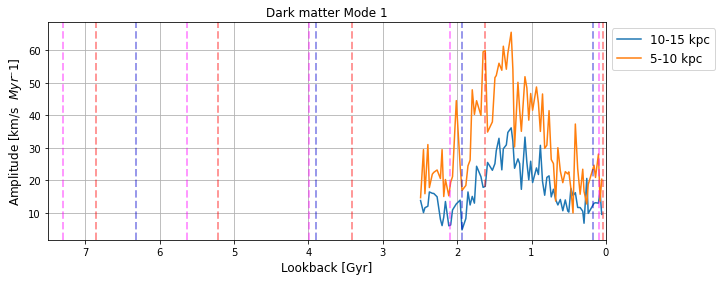

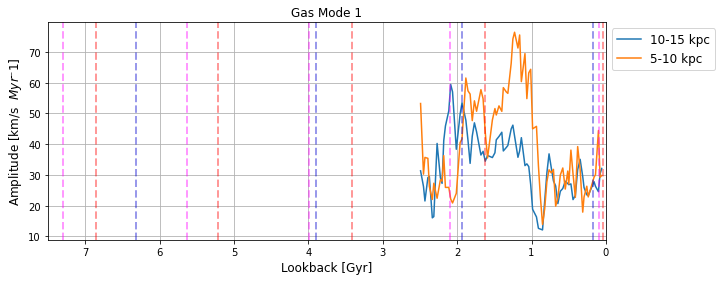

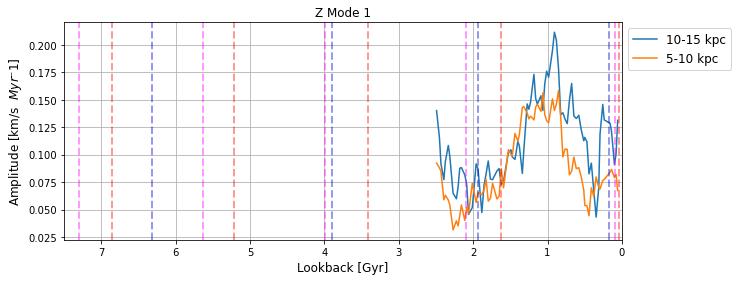

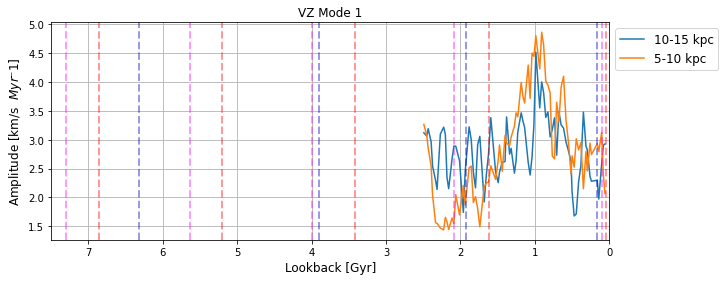

In [12]:
#Epoch 3
      
epoch3_15 = df15.loc[indr==0]
epoch3_10 = df10.loc[indr==0]
epoch3_5 = df5.loc[indr==0]


fig, ax = plt.subplots(figsize = (10,4))
plt.title("Dark matter Mode 1")
ax.plot(epoch3_15["Lookback"],epoch3_15["DM"], label = "10-15 kpc")
ax.plot(epoch3_10["Lookback"],epoch3_10["DM"],label = "5-10 kpc")
#ax.plot(lookback,np.array(ac_dm_estimator_5)*seconds_to_Myr,label = "0-5 kpc")
#ax.plot(resim["Snapshot"], resim["Npart"], color = "blue", label = "resimulacion")
ax.set_xlabel('Lookback [Gyr]', fontsize = 12)
ax.set_ylabel('Amplitude [km/s  $Myr{⁻1}$]', fontsize = 12)
ax.grid()
ax.set_xlim(7.5,0)
ax.legend(fontsize = 12, bbox_to_anchor=(1, 1))
add_satellites(ax)
#fig.savefig("test.png")
#plt.savefig("results/DM_shells.png", dpi = 100,  bbox_inches='tight', facecolor = "white")
plt.show()


fig, ax = plt.subplots(figsize = (10,4))
plt.title("Gas Mode 1")
ax.plot(epoch3_15["Lookback"],epoch3_15["Gas"], label = "10-15 kpc")
ax.plot(epoch3_10["Lookback"],epoch3_10["Gas"],label = "5-10 kpc")
#ax.plot(lookback,np.array(ac_dm_estimator_5)*seconds_to_Myr,label = "0-5 kpc")
#ax.plot(resim["Snapshot"], resim["Npart"], color = "blue", label = "resimulacion")
ax.set_xlabel('Lookback [Gyr]', fontsize = 12)
ax.set_ylabel('Amplitude [km/s  $Myr{⁻1}$]', fontsize = 12)
ax.grid()
ax.set_xlim(7.5,0)
ax.legend(fontsize = 12, bbox_to_anchor=(1, 1))
add_satellites(ax)
#fig.savefig("test.png")
#plt.savefig("results/DM_shells.png", dpi = 100,  bbox_inches='tight', facecolor = "white")
plt.show()



fig, ax = plt.subplots(figsize = (10,4))
plt.title("Z Mode 1")
ax.plot(epoch3_15["Lookback"],epoch3_15["Z"], label = "10-15 kpc")
ax.plot(epoch3_10["Lookback"],epoch3_10["Z"],label = "5-10 kpc")
#ax.plot(lookback,np.array(ac_dm_estimator_5)*seconds_to_Myr,label = "0-5 kpc")
#ax.plot(resim["Snapshot"], resim["Npart"], color = "blue", label = "resimulacion")
ax.set_xlabel('Lookback [Gyr]', fontsize = 12)
ax.set_ylabel('Amplitude [km/s  $Myr{⁻1}$]', fontsize = 12)
ax.grid()
ax.set_xlim(7.5,0)
ax.legend(fontsize = 12, bbox_to_anchor=(1, 1))
add_satellites(ax)
#fig.savefig("test.png")
#plt.savefig("results/DM_shells.png", dpi = 100,  bbox_inches='tight', facecolor = "white")
plt.show()


fig, ax = plt.subplots(figsize = (10,4))
plt.title("VZ Mode 1")
ax.plot(epoch3_15["Lookback"],epoch3_15["VZ"], label = "10-15 kpc")
ax.plot(epoch3_10["Lookback"],epoch3_10["VZ"],label = "5-10 kpc")
#ax.plot(lookback,np.array(ac_dm_estimator_5)*seconds_to_Myr,label = "0-5 kpc")
#ax.plot(resim["Snapshot"], resim["Npart"], color = "blue", label = "resimulacion")
ax.set_xlabel('Lookback [Gyr]', fontsize = 12)
ax.set_ylabel('Amplitude [km/s  $Myr{⁻1}$]', fontsize = 12)
ax.grid()
ax.set_xlim(7.5,0)
ax.legend(fontsize = 12, bbox_to_anchor=(1, 1))
add_satellites(ax)
#fig.savefig("test.png")
#plt.savefig("results/DM_shells.png", dpi = 100,  bbox_inches='tight', facecolor = "white")
plt.show()
